## Skin Disease Data Set Prediction

### BUSINESS CASE : Based on the given features and measurements we have to predict whether the patient will have skin disease or not. After judging the  symptoms, the nature of the disease(class) will be decided for further treatment.

### It is a  Classification task as the 6 diseases are classified into 6 classes.

In [281]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [282]:
# Loading the dataset
data=pd.read_csv("dataset_35_dermatology (1).csv")
pd.set_option("display.max_columns",None)

In [283]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


### Domain Analysis

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.
The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences.

The diseases in this group are:

1)Psoriasis

2)Seboreic dermatitis

3)Lichen planus

4)Pityriasis rosea

5)Chronic dermatitis

6)Pityriasis rubra pilaris

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well.

Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages.

Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

The values of the histopathological features are determined by an analysis of the samples under a microscope.

#### Attribute Information:
##### Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)

1: Erythema

2: Scaling

3: Definite borders

4: Itching

5: Koebner phenomenon

6: Polygonal papules

7: Follicular papules

8: Oral mucosal involvement

9: Knee and elbow involvement

10: Scalp involvement

11: Family history, (0 or 1)

34: Age (linear)

#### Histopathological Attributes: (take values 0, 1, 2, 3)

12: Melanin incontinence

13: Eosinophils in the infiltrate

14: PNL infiltrate

15: Fibrosis of the papillary dermis

16: Exocytosis

17: Acanthosis

18: Hyperkeratosis

19: Parakeratosis

20: Clubbing of the rete ridges

21: Elongation of the rete ridges

22: Thinning of the suprapapillary epidermis

23: Spongiform pustule

24: Munro microabcess

25: Focal hypergranulosis

26: Disappearance of the granular layer

27: Vacuolisation and damage of basal layer

28: Spongiosis

29: Saw-tooth appearance of retes

30: Follicular horn plug

31: Perifollicular parakeratosis

32: Inflammatory monoluclear inflitrate

33: Band-like infiltrate

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

#### Attributes:

1) Erythema: 
It is a clinical attribute and is a type of skin rash caused by injured or inflamed blood capillaries. It usually occurs in response to a drug, disease or infection. Rash severity ranges from mild to life threatening.

2) Scaling: 
Scaling skin is the loss of the outer layer of the epidermis in large, scale-like flakes. The skin appears dry and cracked, though skin dryness isn't always to blame and is also called desquamation, dropping of scales. Scaling skin may arise when an injury or a medical condition damages the outer layer of skin.

3) Definite borders: 
This indicates the irregularity in skin lesion borders and is considered as an important clinical feature for the early diagnosis of melanoma.it is of two types mainly regular and irregular skin lesions borders.

4) Itching: 
Itchy skin is an uncomfortable, irritating sensation that makes you want to scratch. Also known as pruritus and is often caused by dry skin. It's common in older adults, as skin tends to become drier with age. Depending on the cause of your itchiness, your skin may appear normal, red, rough or bumpy. Repeated scratching can cause raised thick areas of skin that might bleed or become infected. The symptoms are: -Redness, Scratch marks, Bumps-spots or blisters, Dry, cracked skin, Leathery or scaly patches. The causes can be: -skin conditions, internal diseases, nerve disorders, pshychiatric conditions, irritation and allergic conditions.

5) Koebner phenomenon: 
The Koebner phenomenon describes the appearance of new skin lesions of a pre-existing dermatosis on areas of cutaneous injury in otherwise healthy skin. It is also known as the Koebner phenomenon and isomorphic response. Any skin injury that penetrates your skin's top layer (epidermis) and middle layer (dermis) may cause Koebner phenomenon, such as: Injections, piercings and punctures. Insect and animal bites. Scratching or self-injury (such as skin picking).3 indicates Maximal Koebner response: lesions develop across the entire injured area.2 means Minimal Koebner response: a lesion develops in a focal area of trauma.1 means Abortive Koebner response: lesions appear, but spontaneously vanish 
after 12–20 days. and 0 indicates No Koebner response to injury.

6) Polygonal papules: 
They are shiny, flat-topped, and firm on palpation. Lichen planus pigmentosus, Oral lichen planus, Atrophic lichen planus, Hypertrophic lichen planus are different polygonal papules. Lichen planus is caused by a T cell–mediated autoimmune reaction against basal epithelial keratinocytes in people with genetic predisposition. LP affects patients of all ages, but up to 95% of all cases occur in adults.
 
7) Follicular papules: 
Follicular contact dermatitis is usually characterized by individual papules that include a central hair follicle. However, prominent hairs within the papules may not be readily visible when the lesions surround vellus hairs. The popular lesions are frequently pruritic and occasionally painful or burning. Folliculitis is most often caused by an infection of hair follicles with Staphylococcus aureus (staph) bacteria. Folliculitis may also be caused by viruses, fungi and even an inflammation from ingrown hairs. It was noted to increase in frequency with increasing age, was most common in patients 20 to 40 years of age, and was twice as common in women than in men.

8) Oral mucosal involvement: 
The oral mucosa is the mucous membrane lining or “skin” inside of the mouth, including cheeks and lips. It acts as a protective physical and immune barrier from external stimulus and harbors minor salivary glands that secret saliva maintaining the wetness of the tissue, and perceives and responds to the stimulus of temperature, touch, and pain. Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. Mucosal involvement may include erythema, edema, sloughing, blistering, ulceration, and necrosis. Oral mucosal conditions and diseases may be caused by local causes (bacterial or viral), systemic diseases (metabolic or immunologic), drug related reactions, or lifestyle factors such as consumption of tobacco, betel quid or alcohol.

9) Knee and elbow involvement:
Extensor surfaces (the front of the knee and the back of the elbow or forearm) are skin surfaces on the outside of a joint that are common regions for lesions or other skin changes in certain skin disorders. Plaque psoriasis, also known as psoriasis vulgaris, is the most common type, accounting for up to 90% of cases. It can affect any part of the body but most often develops on the elbows, knees, and lower back. Moreover, the skin of the knees and elbows are frequent sites of trauma, including abrasions and contusions. Over time, this causes the skin to thicken, a condition known as epidermal hyperplasia. Inflamed skin or scaly lesions on extensor surfaces are often linked to autoimmune disorders, such as psoriasis and celiac disease, or hypersensitive or allergic reactions to medications or infections.

10) Scalp involvement: 
Scalp skin is unique on the body due to the density of hair follicles and high rate of sebum production. These features make it susceptible to superficial mycotic conditions (dandruff, seborrheic dermatitis, and tinea capitis), parasitic infestation (pediculosis capitis), and inflammatory conditions (psoriasis). Hyperkeratosis (scaling), pruritus, alopecia, and inflammatory signs (erythema, purulence) are common symptoms of scalp disorders. Scaling and pruritus are extremely common complaints. Below mentioned are the age at which the diseases affect: -
*Dandruff- After puberty
*Seborrheic dermatitis- Infancy (cradle cap)
*Tinea capitis- Children, occasionally adults (more common post-menopausal women)
*Parasitic Pediculosis capitis-School age children
*Inflammatory Psoriasis-Any age
 
11) Family history:
 Skin diseases affect the skin and its projections and some of them can be inherited from your genes. Such diseases are mainly caused by single-gene mutations and result in skin cancer, acne, lupus, psoriasis, hives, warts and carbuncles. The family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

12) Age: 
The age feature simply represents the age of the patient.

13) Melanin incontinence:
Melanin incontinence (pigmentary incontinence) is the presence of melanin in the superficial dermis, due to the loss of melanin from damaged cells of the basal layer.it is most commonly seen following, or in association with, established lichenoid reactions.This condition is inherited in an X-linked dominant pattern. The gene associated with this condition is located on the X chromosome, which is one of the two sex chromosomes. In females (who have two X chromosomes), a mutation in one of the two copies of the gene in each cell is sufficient to cause the disorder

14) Eosinophils in the infiltrate: 
Focal eosinophilic infiltration in the lungs and liver is relatively common and is often associated with a parasitic infection, drug hypersensitivity, allergic diseases, collagen vascular diseases, and internal malignancies such as Hodgkin's disease, as well as cancer of the lung, stomach, pancreas or ovary.

15) PNL infiltrate: 
It is Pure neuritic leprosy. Leprosy is primarily a disease of the nerves. The nerve involvement in the form of nerve deficit or nerve thickening, without any cutaneous lesions, with a negative skin smear and no other identifiable pathology. This is commonly known as pure neuritic leprosy (PNL). The most common presentation of PNL is a mononeuritis (single nerve involvement) which occurs in about 60% of the cases. PNL is a definite clinical entity with subtle findings, which is diagnosed byclinical, histopathological, bacteriological, electrophysiological and ultrasound criteria. Early diagnosis and prompt institution of treatment is required for better functional recovery and prevenion of disabilities.

16) Fibrosis of the papillary dermis: 
Fibrosis is often a sequela of epidermal or dermal injury due to chronic chemical exposure or trauma. It is characterized by an increase of fibrous connective tissues in the dermis (Figure 1) or subcutis and usually accompanies chronic inflammation. Dermal fibrosis may result from a variety of insults including trauma, irradiation or such diseases as scleroderma. Not only is fibrosis disfiguring but it may also lead to death due to loss of function and fibrosis of internal organs, as occurs in scleroderma or cirrhosis of the liver.

17) Exocytosis:
Exocytosis is the fusion of secretory vesicles with the plasma membrane and results in the discharge of vesicle content into the extracellular space and the incorporation of new proteins and lipids into the plasma membrane. Exocytosis occurs when a vesicle fuses with the plasma membrane, allowing its contents to be released outside the cell. Three pathways of exocytosis are constitutive exocytosis, regulated exocytosis, and lysosome mediated exocytosis. Steps of exocytosis include vesicle trafficking, tethering, docking, priming, and fusing. Vesicle fusion with the cell membrane may be complete or temporar.

18) Acanthosis: 
Acanthosis nigricans is a skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. Acanthosis nigricans is a condition that causes areas of dark, thick velvety skin in body folds and creases. It typically affects the armpits, groin and neck. Acanthosis nigricans is most commonly caused by high blood insulin levels, a condition called insulin resistance. Insulin resistance is seen in people who are overweight or obese, and makes them more likely to develop type 2 diabetes. 

19) Hyperkeratosis: 
Hyperkeratosis refers to the increased thickness of the stratum corneum, the outer layer of the skin. Stratum corneum is composed of multiple layers of keratinocyte bodies that, during maturation, produced keratin and subsequently have lost their nucleus and cytoplasmic organelles. Pressure-related hyperkeratosis occurs as a result of excessive pressure, inflammation or irritation to the skin. When this happens, the skin responds by producing extra layers of keratin to protect the damaged areas of skin. Non-pressure related keratosis occurs on skin that has not been irritated.

20) Parakeratosis: 
Parakeratosis refers to incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis. Parakeratosis most often is caused by consumption of excessive calcium. Affected pigs show few signs of illness other than skin lesions and reduced growth rate. Initial lesions appear as reddened macules and papules on the ventrolateral abdomen and medial surface of the thighs; these lesions often go unobserved.

21) Clubbing of the rete ridges: 
This is the microscopic appearance of lentigo senilis, commonly known as an age or "liver" spot. The rete ridges are elongated and appear club-shaped or tortuous. Melanocytes are increased in the basal layer and melanophages appear in the upper dermis.

22) Elongation of the rete ridges: 
Elongation of the rete ridges and increased pigmentation in the basal cell region is present with transepidermal pigment cell excretion. Radiation lentigines show increased melanin deposition in basal keratinocytes, cellular or nuclear atypia, increased number of melanocytes, and reduction of rete ridges.

23) Thinning of the suprapapillary epidermis: 
In some areas of the body such as the palms and soles, the rete pegs are less pronounced. The pillars of dermis next to the rete pegs form the rete ridges. The small area of epidermis between rete pegs is called the suprapapillary plate.Tt is the thinning of the granular layer at the tips of the papillae. The elongation of the rete pegs was also considered in this factor. It was graded on a visual analogue scale as 0 to 3.

24) Spongiform pustule:
An epidermal pustule formed by infiltration of neutrophils into necrotic epidermis in which the cell walls persist as a spongelike network; seen in pustular psoriasis. Pustular psoriasis is microscopically manifested as characteristic spongiform pustule of Kogoj, due to neutrophils migrations from superficial dermal capillaries to intercellular spaces of the edematous Malpighian layer, leading to keratinocytes degeneration and formation of unilocular pustules.

25) Munro microabcess: 
Munro's microabscess is an abscess (collection of neutrophils) in the stratum corneum of the epidermis due to the infiltration of neutrophils from papillary dermis into the epidermal stratum corneum. They are a cardinal sign of psoriasis where they are seen in the hyperkeratotic and parakeratotic areas of the stratum corneum. Munro microabscesses are not seen in seborrheic dermatitis.

26) Focal hypergranulosis: 
Hypergranulosis is an increased thickness of the stratum granulosum. It is seen in skin diseases with epidermal hyperplasia and orthokeratotic hyperkeratosis. Hypergranulosis can be seen in many different types of skin conditions 
including:
* Viral warts
* Many types of rashes
* Trauma caused by rubbing, itching, and scratching of the skin
* Chronic inflammation of the skin
* Certain types of nevi

27) Disappearance of the granular layer: 
The deeper layer of the cortex of the cerebellum containing numerous small closely packed cells. the layer receives, transforms and delays input signals coming from many different senses like touch, vision and balance, and that these transformed signals then serve as a basis to generate responses that help to control the muscles of the body. The granular layer is sometimes reduced in psoriatic skin [23]. If the granular layer is completely absent, the overlying stratum corneum (SC) is often parakeratotic.

28) Vacuolisation and damage of basal layer: 
Vacuolization refers specifically to vacuoles in the basal cell-basement membrane zone area, where it is an unspecific sign of disease. It may be a sign of for example vacuolar interface dermatitis, which in turn has many causes like purpura with RBCs extravasated into the upper dermis (which are the reasons for the rash).

29) Spongiosis: 
Spongiosis is a well-established histologic hallmark of the epidermis in eczema. It is characterized by the diminution and rounding of keratinocytes (condensation), and widening of intercellular spaces resulting in a sponge like appearance of the epidermis that can lead to formation of small intraepidermal vesicles. allergic reactions, such as to medications or food. contact with objects that cause irritation, such as chemicals, certain ingredients in cosmetics, or certain metals in jewelry. fungal infection. stress, which can weaken your immune system and cause breakouts.

30) Saw tooth appearance of retes: 
In skin lesions, the rete ridges have a saw tooth appearance. A type of epidermal acanthosis characterized by a jagged (sawtooth) appearance of the rete ridges of the epidermis. Saw tooth” rete ridges are classically seen in oral lichen planus and lichenoid reactions/lesions. The normal “U-shaped” rete ridges become pointed resembling a “saw tooth”, hence the name. The rete ridge, in these lesions, assumes this shape due to the basal cell degeneration of the epithelium by the subjacent inflammatory cells.

31) Follicular horn plug: 
Follicular keratotic plugs are a marker of DLE and were originally described as a sign of early and active lesions and not in areas of scarring or healed skin. They correlate with the hyperkeratosis and the plugging of follicular ostia with keratotic material.The precise cause or causes of follicular occlusion are unknown. There are genetic, hormonal and environmental influences. Environmental factors may include smoking, obesity, high carbohydrate diet, humidity, and bacteria.it encompass a large number of relatively rare small horn cysts and, less frequently, sebaceous ducts, sebocytes etc.

32) Perifollicular parakeratosis: 
Parakeratosis refers to incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis. The skin may be dry and rough, with dirt and debris accumulating in the lesions. In severe cases, reduced growth rate and appetite are seen,occasionally accompanied by vomiting and diarrhea. 

33) Inflammatory monoluclear inflitrate: 
Mononuclear cell infiltration is a consistent histopathologic finding of GVHD of the gut, liver, and lung, suggesting that chemokine receptor: ligand interactions involving CCR2 and perhaps CCR5 facilitate the recruitment of these cells to target tissues. infiltrating mononuclear cells change impacts the local immune control and is gradually broken down in progressive tumor growth, even if some cytotoxic activity is still present.

34) Band like infiltrate:
Lichenoid is defined by the pathologist as a bandlike infiltrate of inflammatory cells in the superficial dermis, parallel to the epidermis. Liquefaction degeneration of the basal layer, colloid bodies and melanin incontinence frequently occur together. The band of inflammatory cells is usually mostly lymphocytes, except there may be plasma cells (syphilis, mucous membranes, Zoon's balanitis), or eosinophils (lichenoid drug reaction).

35) Class: 
There are 6 classes of diseases in this data set. They are psoriasis, seboreic dermatitis, 
lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.

# BASIC CHECKS

In [284]:
# first five rows
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [285]:
# last five rows
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [286]:
# shape of dataset
data.shape

(366, 35)

* Dataset contains 366 observations with 35 features.

In [287]:
# checking statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [288]:
# Examining the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

* Age -  The one with object type data type.

In [289]:
# columns in dataset
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [290]:
# Checking missing values
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

* No missing values present in dataset.

In [291]:
data.erythema.value_counts()

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64

In [292]:
data.erythema.unique()

array([2, 3, 1, 0], dtype=int64)

In [293]:
data['vacuolisation_and_damage_of_basal_layer'].value_counts()

0    294
2     43
3     26
1      3
Name: vacuolisation_and_damage_of_basal_layer, dtype: int64

In [294]:
data['vacuolisation_and_damage_of_basal_layer'].unique()

array([0, 2, 3, 1], dtype=int64)

In [295]:
data.definite_borders.value_counts()

2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64

In [296]:
data.definite_borders.unique()

array([0, 3, 2, 1], dtype=int64)

In [297]:
data.scaling.value_counts()

2    195
1    111
3     52
0      8
Name: scaling, dtype: int64

In [298]:
data.scaling.unique()

array([2, 3, 1, 0], dtype=int64)

In [299]:
data.itching.value_counts()

0    118
2    100
3     76
1     72
Name: itching, dtype: int64

In [300]:
data.itching.unique()

array([3, 2, 0, 1], dtype=int64)

In [301]:
data.koebner_phenomenon.value_counts()

0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64

In [302]:
data.koebner_phenomenon.unique()

array([0, 1, 2, 3], dtype=int64)

In [303]:
data.polygonal_papules.unique()

array([0, 3, 2, 1], dtype=int64)

In [304]:
data.polygonal_papules.value_counts()

0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64

In [305]:
data.follicular_papules.unique()

array([0, 3, 1, 2], dtype=int64)

In [306]:
data.follicular_papules.value_counts()

0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64

In [307]:
data.oral_mucosal_involvement.unique()

array([0, 3, 2, 1], dtype=int64)

In [308]:
data.oral_mucosal_involvement.value_counts()

0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64

In [309]:
data.knee_and_elbow_involvement.unique()

array([1, 0, 3, 2], dtype=int64)

In [310]:
data.knee_and_elbow_involvement.value_counts()

0    251
2     64
1     28
3     23
Name: knee_and_elbow_involvement, dtype: int64

In [311]:
data.scalp_involvement.unique()

array([0, 1, 2, 3], dtype=int64)

In [312]:
data.scalp_involvement.value_counts()

0    264
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64

In [313]:
data.family_history.value_counts()

0    320
1     46
Name: family_history, dtype: int64

In [314]:
data.family_history.unique()

array([0, 1], dtype=int64)

In [315]:
data.melanin_incontinence.unique()

array([0, 1, 2, 3], dtype=int64)

In [316]:
data.melanin_incontinence.value_counts()

0    296
2     46
3     16
1      8
Name: melanin_incontinence, dtype: int64

In [317]:
data.eosinophils_in_the_infiltrate.unique()

array([0, 2, 1], dtype=int64)

In [318]:
data.eosinophils_in_the_infiltrate.value_counts()

0    324
1     33
2      9
Name: eosinophils_in_the_infiltrate, dtype: int64

In [319]:
data.PNL_infiltrate.value_counts()

0    235
1     69
2     55
3      7
Name: PNL_infiltrate, dtype: int64

In [320]:
data.PNL_infiltrate.unique()

array([0, 1, 3, 2], dtype=int64)

In [321]:
data.fibrosis_of_the_papillary_dermis.value_counts()

0    312
3     23
2     23
1      8
Name: fibrosis_of_the_papillary_dermis, dtype: int64

In [322]:
data.fibrosis_of_the_papillary_dermis.unique()

array([0, 3, 1, 2], dtype=int64)

In [323]:
data.exocytosis.value_counts()

2    129
0    118
3     62
1     57
Name: exocytosis, dtype: int64

In [324]:
data.exocytosis.unique()

array([3, 1, 0, 2], dtype=int64)

In [325]:
data.acanthosis.unique()

array([2, 3, 1, 0], dtype=int64)

In [326]:
data.acanthosis.value_counts()

2    210
3     75
1     71
0     10
Name: acanthosis, dtype: int64

In [327]:
data.hyperkeratosis.value_counts()

0    227
1     90
2     44
3      5
Name: hyperkeratosis, dtype: int64

In [328]:
data.hyperkeratosis.unique()

array([0, 2, 1, 3], dtype=int64)

In [329]:
data.parakeratosis.unique()

array([0, 2, 3, 1], dtype=int64)

In [330]:
data.parakeratosis.value_counts()

2    132
1    118
0     86
3     30
Name: parakeratosis, dtype: int64

In [331]:
data.clubbing_of_the_rete_ridges.value_counts()

0    252
2     61
3     34
1     19
Name: clubbing_of_the_rete_ridges, dtype: int64

In [332]:
data.clubbing_of_the_rete_ridges.unique()

array([0, 2, 1, 3], dtype=int64)

In [333]:
data.elongation_of_the_rete_ridges.unique()

array([0, 2, 3, 1], dtype=int64)

In [334]:
data.elongation_of_the_rete_ridges.value_counts()

0    198
2     95
3     50
1     23
Name: elongation_of_the_rete_ridges, dtype: int64

In [335]:
data.thinning_of_the_suprapapillary_epidermis.unique()

array([0, 2, 3, 1], dtype=int64)

In [336]:
data.thinning_of_the_suprapapillary_epidermis.value_counts()

0    256
2     60
3     31
1     19
Name: thinning_of_the_suprapapillary_epidermis, dtype: int64

In [337]:
data.spongiform_pustule.value_counts()

0    296
1     38
2     26
3      6
Name: spongiform_pustule, dtype: int64

In [338]:
data.spongiform_pustule.unique()

array([0, 2, 1, 3], dtype=int64)

In [339]:
data.munro_microabcess.unique()

array([0, 1, 2, 3], dtype=int64)

In [340]:
data.munro_microabcess.value_counts()

0    286
1     37
2     33
3     10
Name: munro_microabcess, dtype: int64

In [341]:
data.focal_hypergranulosis.unique()

array([0, 2, 3, 1], dtype=int64)

In [342]:
data.focal_hypergranulosis.value_counts()

0    295
2     43
3     15
1     13
Name: focal_hypergranulosis, dtype: int64

In [343]:
data.disappearance_of_the_granular_layer.value_counts()

0    273
2     49
1     30
3     14
Name: disappearance_of_the_granular_layer, dtype: int64

In [344]:
data.disappearance_of_the_granular_layer.unique()

array([0, 3, 2, 1], dtype=int64)

In [345]:
data.spongiosis.unique()

array([3, 0, 2, 1], dtype=int64)

In [346]:
data.spongiosis.value_counts()

0    199
2     96
3     43
1     28
Name: spongiosis, dtype: int64

In [347]:
data['saw-tooth_appearance_of_retes'].value_counts()

0    294
2     40
3     27
1      5
Name: saw-tooth_appearance_of_retes, dtype: int64

In [348]:
data['saw-tooth_appearance_of_retes'].unique()

array([0, 2, 3, 1], dtype=int64)

In [349]:
data.follicular_horn_plug.value_counts()

0    344
1     10
2      8
3      4
Name: follicular_horn_plug, dtype: int64

In [350]:
data.follicular_horn_plug.unique()

array([0, 1, 2, 3], dtype=int64)

In [351]:
data.perifollicular_parakeratosis.value_counts()

0    345
2     13
1      4
3      4
Name: perifollicular_parakeratosis, dtype: int64

In [352]:
data.perifollicular_parakeratosis.unique()

array([0, 2, 1, 3], dtype=int64)

In [353]:
data.inflammatory_monoluclear_inflitrate.value_counts()

2    206
1     85
3     62
0     13
Name: inflammatory_monoluclear_inflitrate, dtype: int64

In [354]:
data.inflammatory_monoluclear_inflitrate.unique()

array([1, 2, 3, 0], dtype=int64)

In [355]:
data['band-like_infiltrate'].unique()

array([0, 3, 1, 2], dtype=int64)

In [356]:
data['band-like_infiltrate'].value_counts()

0    289
3     52
2     22
1      3
Name: band-like_infiltrate, dtype: int64

In [357]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [358]:
data['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [359]:
data.Age.value_counts()

40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: Age, Length: 61, dtype: int64

In [360]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

* In Age '?' and '0' are available, this means data is corrupted.

In [361]:
## Handling of Corrupted data

In [364]:
# Replacing '?' and '0' with nan value
data.Age.replace('?',np.nan,inplace=True)
data.Age.replace(0,np.nan,inplace=True)

In [365]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', nan, '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

## EXPLORATORY DATA ANALYSIS

### Univariant Analysis

In [368]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from Univariant Analysis

1] Erythema:- 
  * Almost 59% of the patients have erythema and comes under 2nd category.
  * Almost 25% of the patients have erythema and comes under 3rd category.
  * Only 1% of of patients have erythema and comes under 0 category.

2] scaling:-
  * 53% scaling comes under 2nd category.
  * 2% scaling comes under 0th category.

3] Definite Borders:-
  * 46% definite borders comes under 2nd category.
  * 13% definite border comes under 3rd category and its very less as compare to others.

4] Itching:-
  * 32% inching comes under 0th category and patients have no itching.
  * 27% iching comes under 2nd category and patients have itching.
  * 20% iching comes under 1th category and patients have itching.

5] Koebner Phenomenon:-
  * 61% of patients have no presence of koebner phenomenon.
  * 5% of patients have very less presence of koebner phenomenon and comes under 3rd category.

6] Polygonal Papules:-
  * 81% comes under 0th category.
  * 11%  comes under 2nd category and 7% comes under 3rd category.

7] Follicular Papules:-
  * 91% of patients have no presence of follicular papules.
  * Rest of 9% of patients have presence of follicular papules.

8] Oral Mucosal Involvement:-
  * 82% have no presence of oral mucosal involvement.
  * 12% have presence of oral mucosal involvement and comes under 2nd category.

9] Knee and elbow Involvement:-
  * 69% have no presence of Knee and elbow involvement.
  * 17% have presence of Knee and elbow involvement and comes under 2nd category.

10] Scalp Involvement:-
  * 72% of patients have no presence of scalp involvement.
  * 15% of patients have presence of scalp involvement and comes under 2nd category.

11] Family History:-
  * 87% of patients have no family history for skin disorder.
  * 13% of patients have family history for skin disorder.

12] Melanin Incontinence:-
  * 81% comes under 0th category.
  * 13% comes under 2nd category.

13] Eosinophils in the infiltrate:-
  * 89% comes under 0th category.
  * 9% comes under 1st and 2% comes under 2nd categories.

14] PNL Infiltrate:-
  * 64% have no presence of PNL infiltrate.
  * 19% have presence of PNL infiltrate and come under 1st category.

15] Fibrosis of the papillary dermis:-
  * 85% are in 0th category.
  * only 6% presence of fibrosis of the papillary dermis come under 2nd and 3rd category.

16] Exocytosis:-
  * 35% come in 2nd category.
  * 32% found no presence in it.

17] Acanthosis:-
  * Almost 57% have come in 2nd category.
  * 3% come under no Acanthosis.

18] Hyperkeratosis:-
  * 62% have no hyperkeratosis.
  * 25% have more hyperkeratosis in 1st category.

19] Parakeratosis:-
  * Most patient have parakeratosis.

20] Clubbing of the rete ridges:-
  * 69% come under 0 category.
  * 31% come under 1st,2nd,3rd category.

21] Elongation of the rete ridges:-
  * 54% have no presence in it.
  * 40% come under 2nd and 3rd categories.

22] Thinning of the suprapapillary epidermis:-
  * 70% are under 0 category.

23] Spongiform pustule:-
  * 81% are under 0th category.
  * only 10% come under 1st category.

24] Munro microabcess:-
  * 72% are come under 0th category.
  * 3% are come under 3rd category.

25] Focal hypergranulosis:-
  * 81% are under 0th category.
  * 4% are under 1st and 3rd categories.

26] Disappearance of the granular layer:-
  * 75% are come under 0th category.
  * only 4% come under 3rd category.

27] vacuolisation and damage of basal layer:-
  * 80% are come under 0th category.
  * less than 1% come under 1st category.

28] Spongiosis:-
  * 54% have no presence and 26% highly present.

29] Saw-tooth appearance of retes:-
  * 80% have no presence.
  * 11% have high presence in it.

30] Follicular horn plug:-
  * 94% have no presence in it.

31] Perifollicular parakeratosis:-
  * 94% have no presence in it.
  * only 1% present in 1st and 3rd categories.

32] Inflammatory monoluclear inflitrate:-
  * Most of the patients have the presence of this disease.
  * 56% have highly present in 2nd category.

33] Band like infiltrate:-
  * 79% of no presence in it.

34] Age:-
  * only 7% of patients are of age above 60
  * 36% are in b/w 40-60
  * 57% of the age below 40 in which 14% are below 20

35] class:-
  * diseases are divided in 6 classes in which 31% of patients are under class 1
  * 20% are under class 3, 17% under class 2, 14% under class 5, 13% under class 4
  * very few patients (5%) comes under class 6

### Bivariant Analysis

In [369]:
data1=data[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', ]]

data2=data[['melanin_incontinence','eosinophils_in_the_infiltrate', 
            'PNL_infiltrate','fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
            'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
            'elongation_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis']]

data3=data[['spongiform_pustule','munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer','vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug','perifollicular_parakeratosis',
            'inflammatory_monoluclear_inflitrate','band-like_infiltrate']]

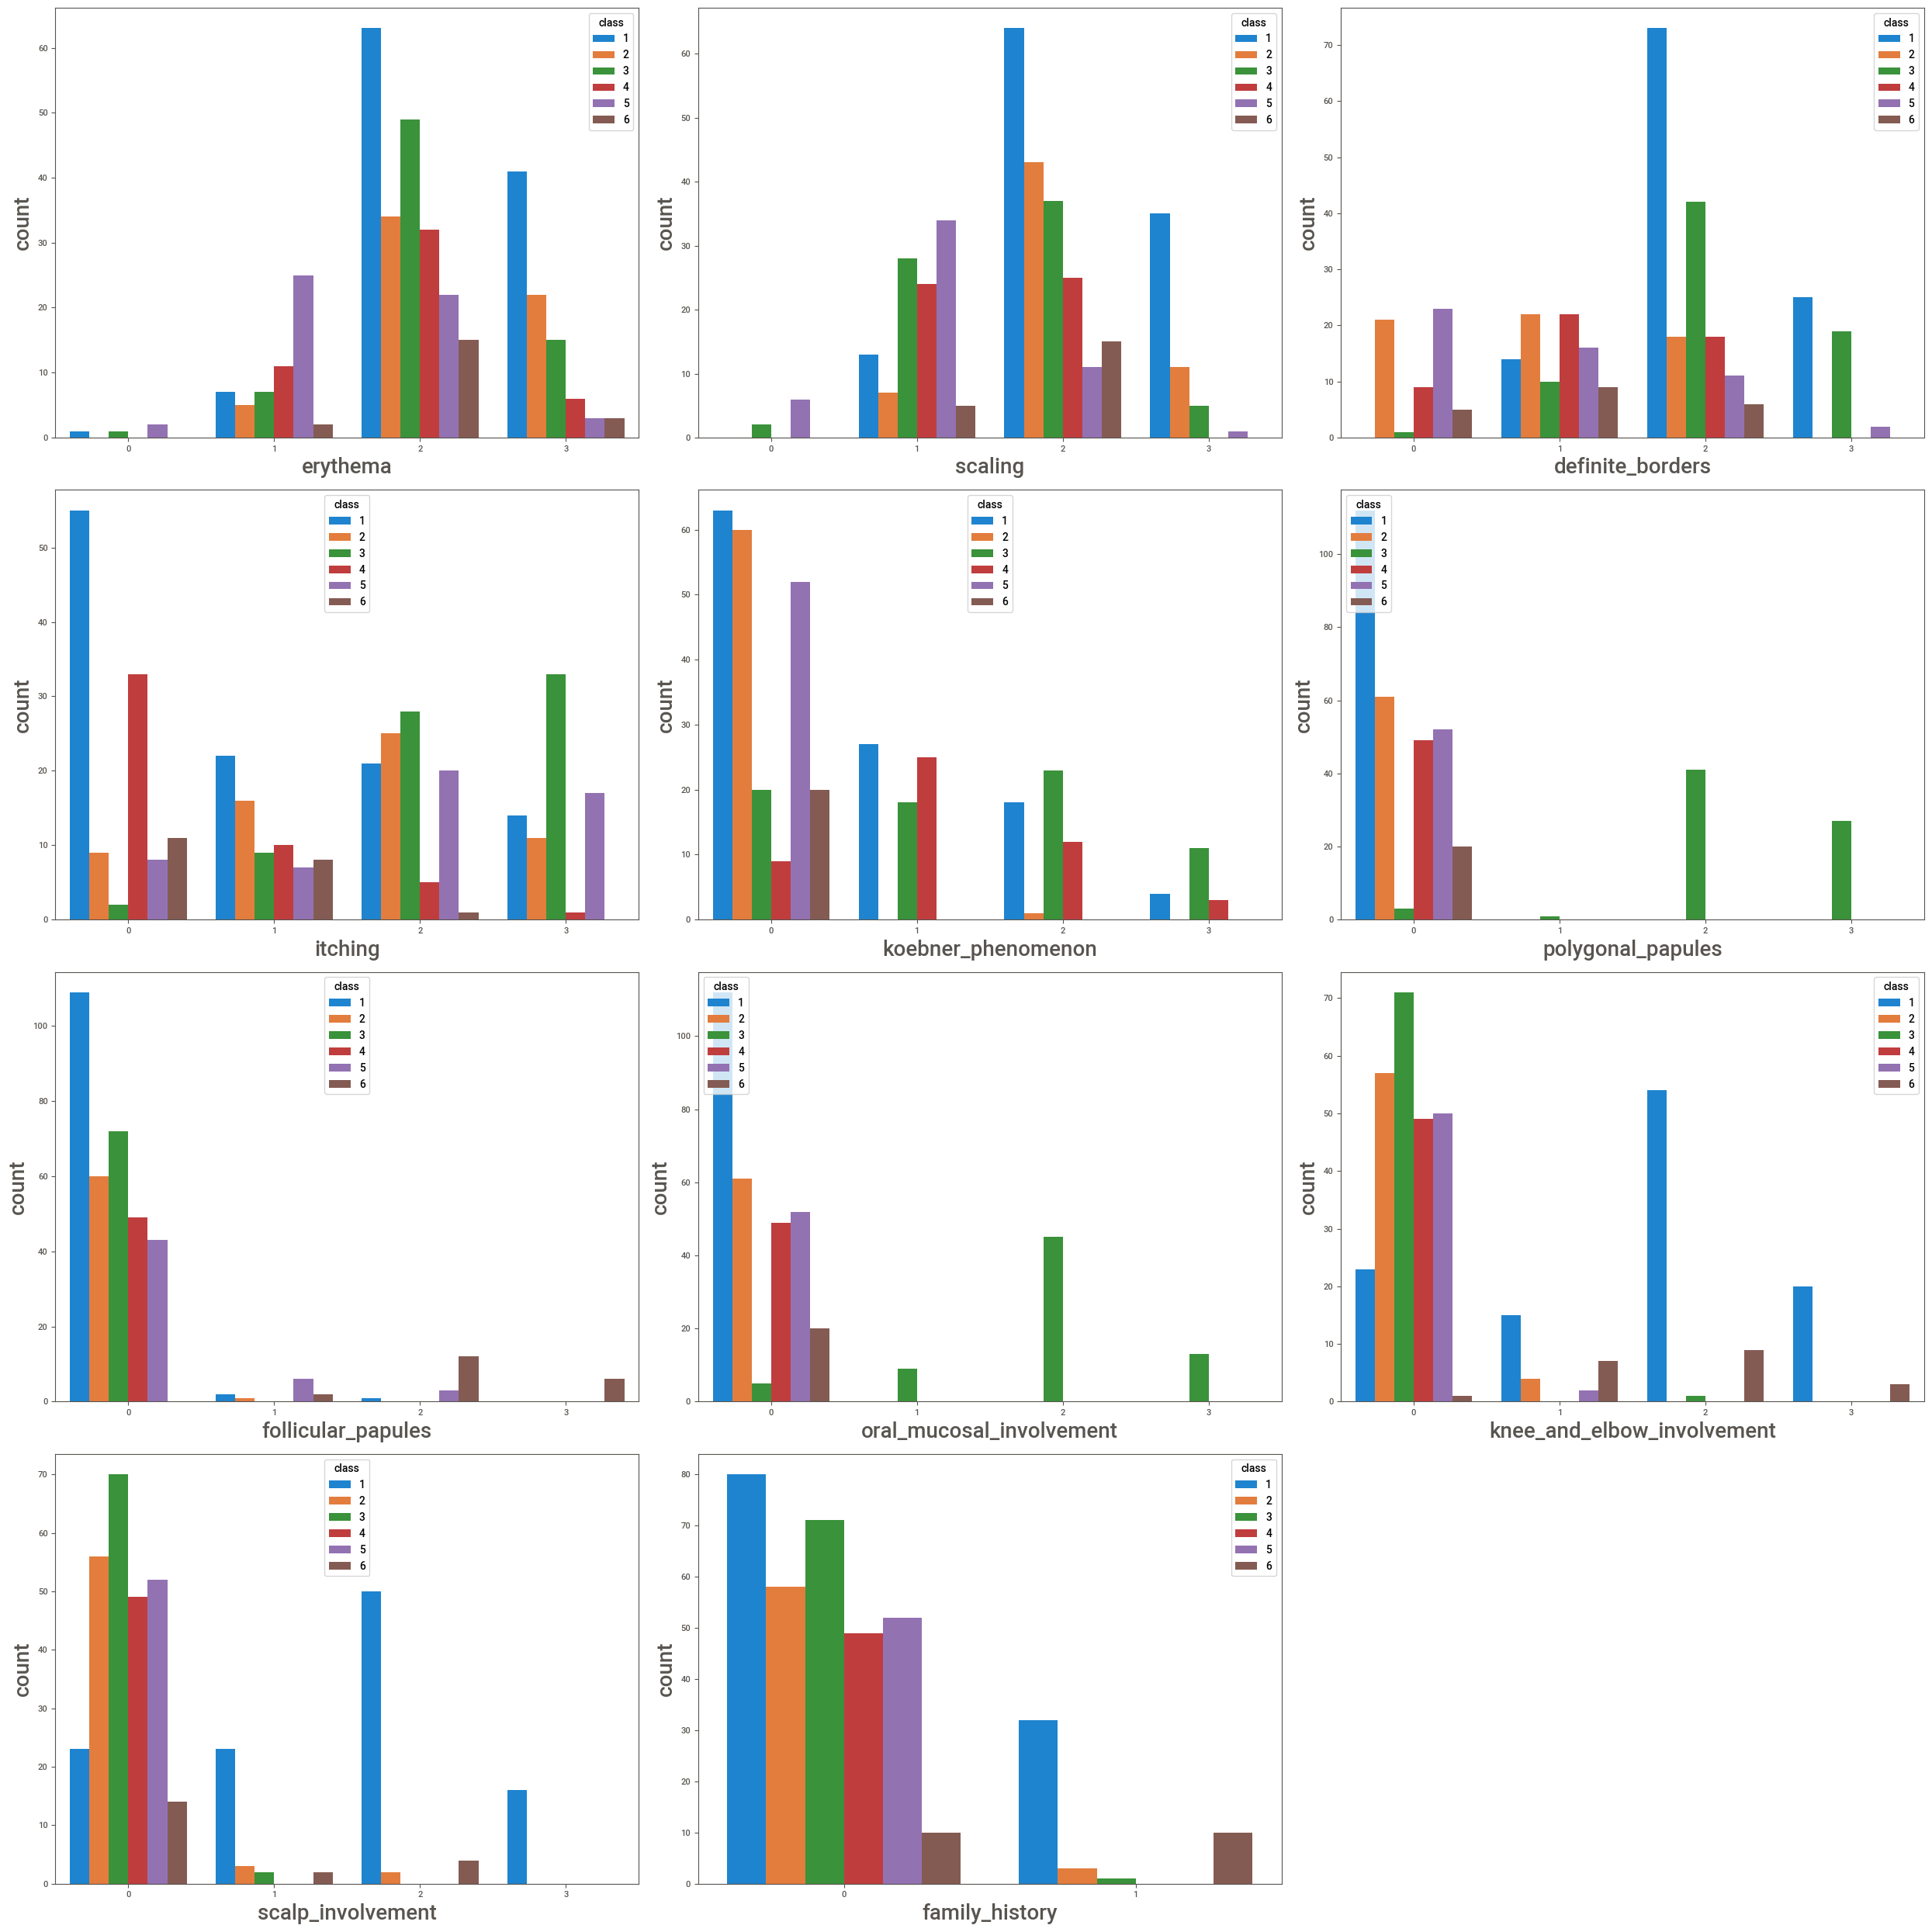

In [370]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=16 :
        ax=plt.subplot(4,3,plotnumber)
        sns.countplot(x=data1[column],hue='class',data=data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

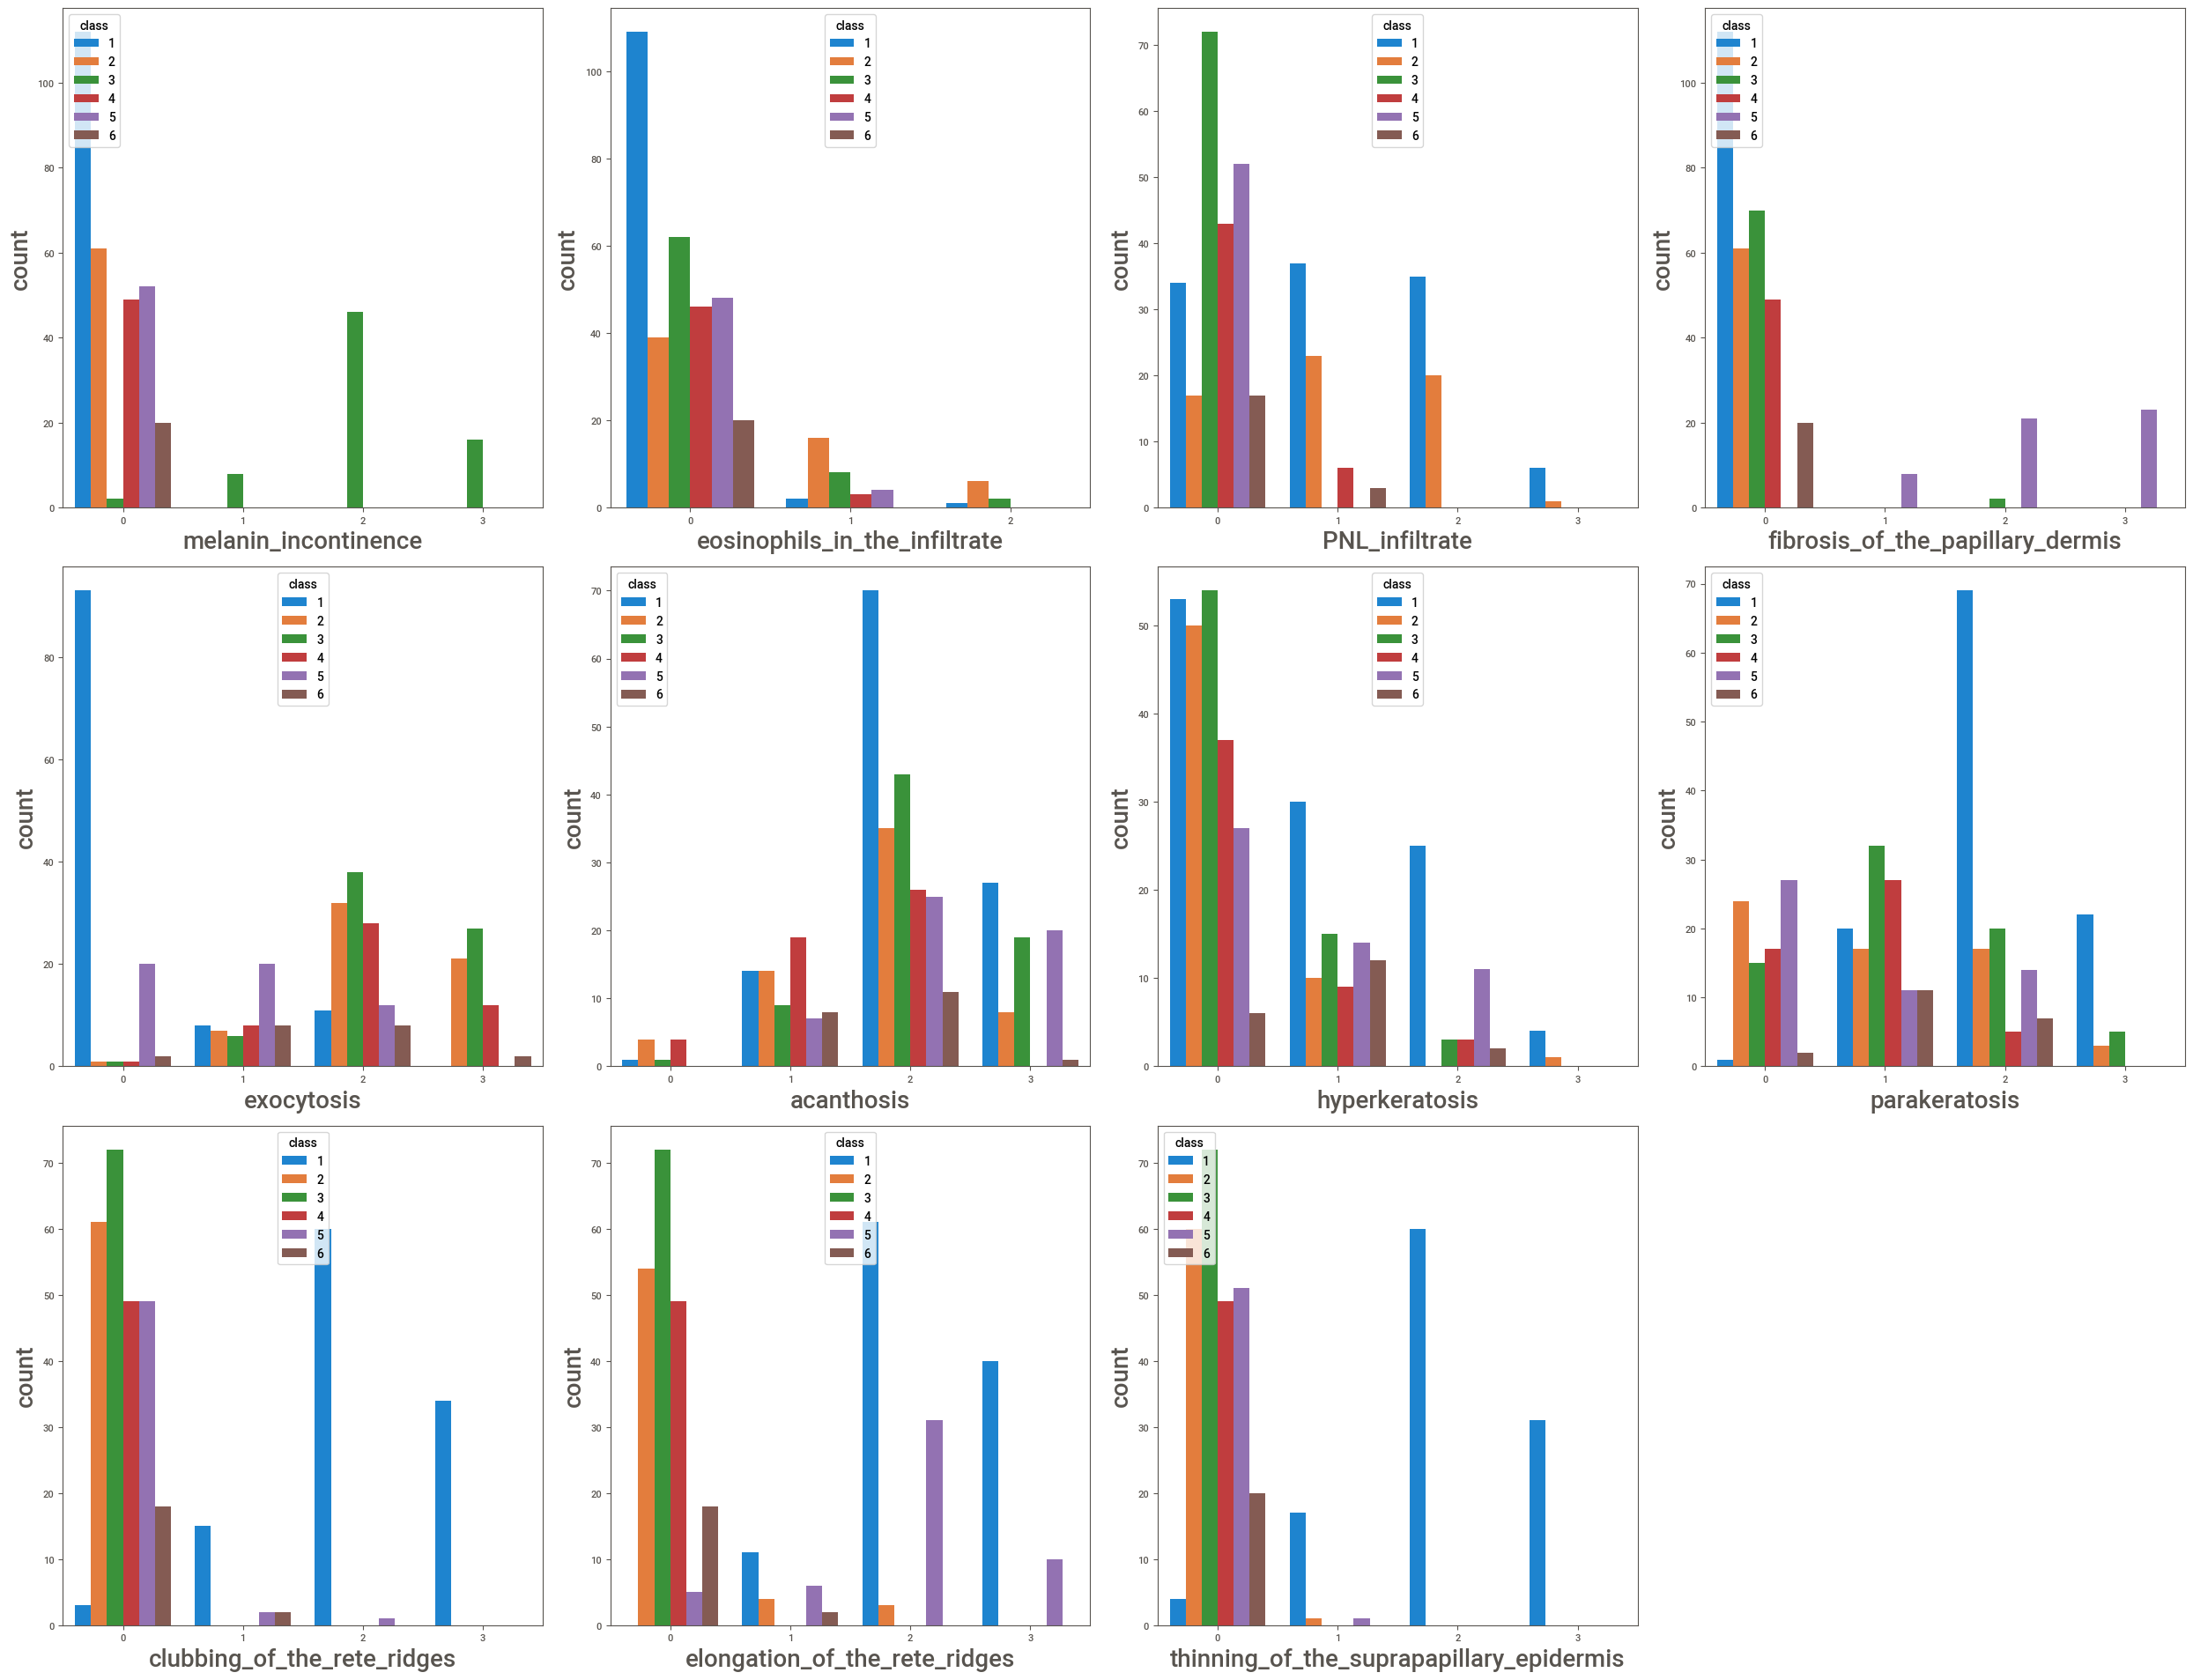

In [371]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column],hue='class',data=data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

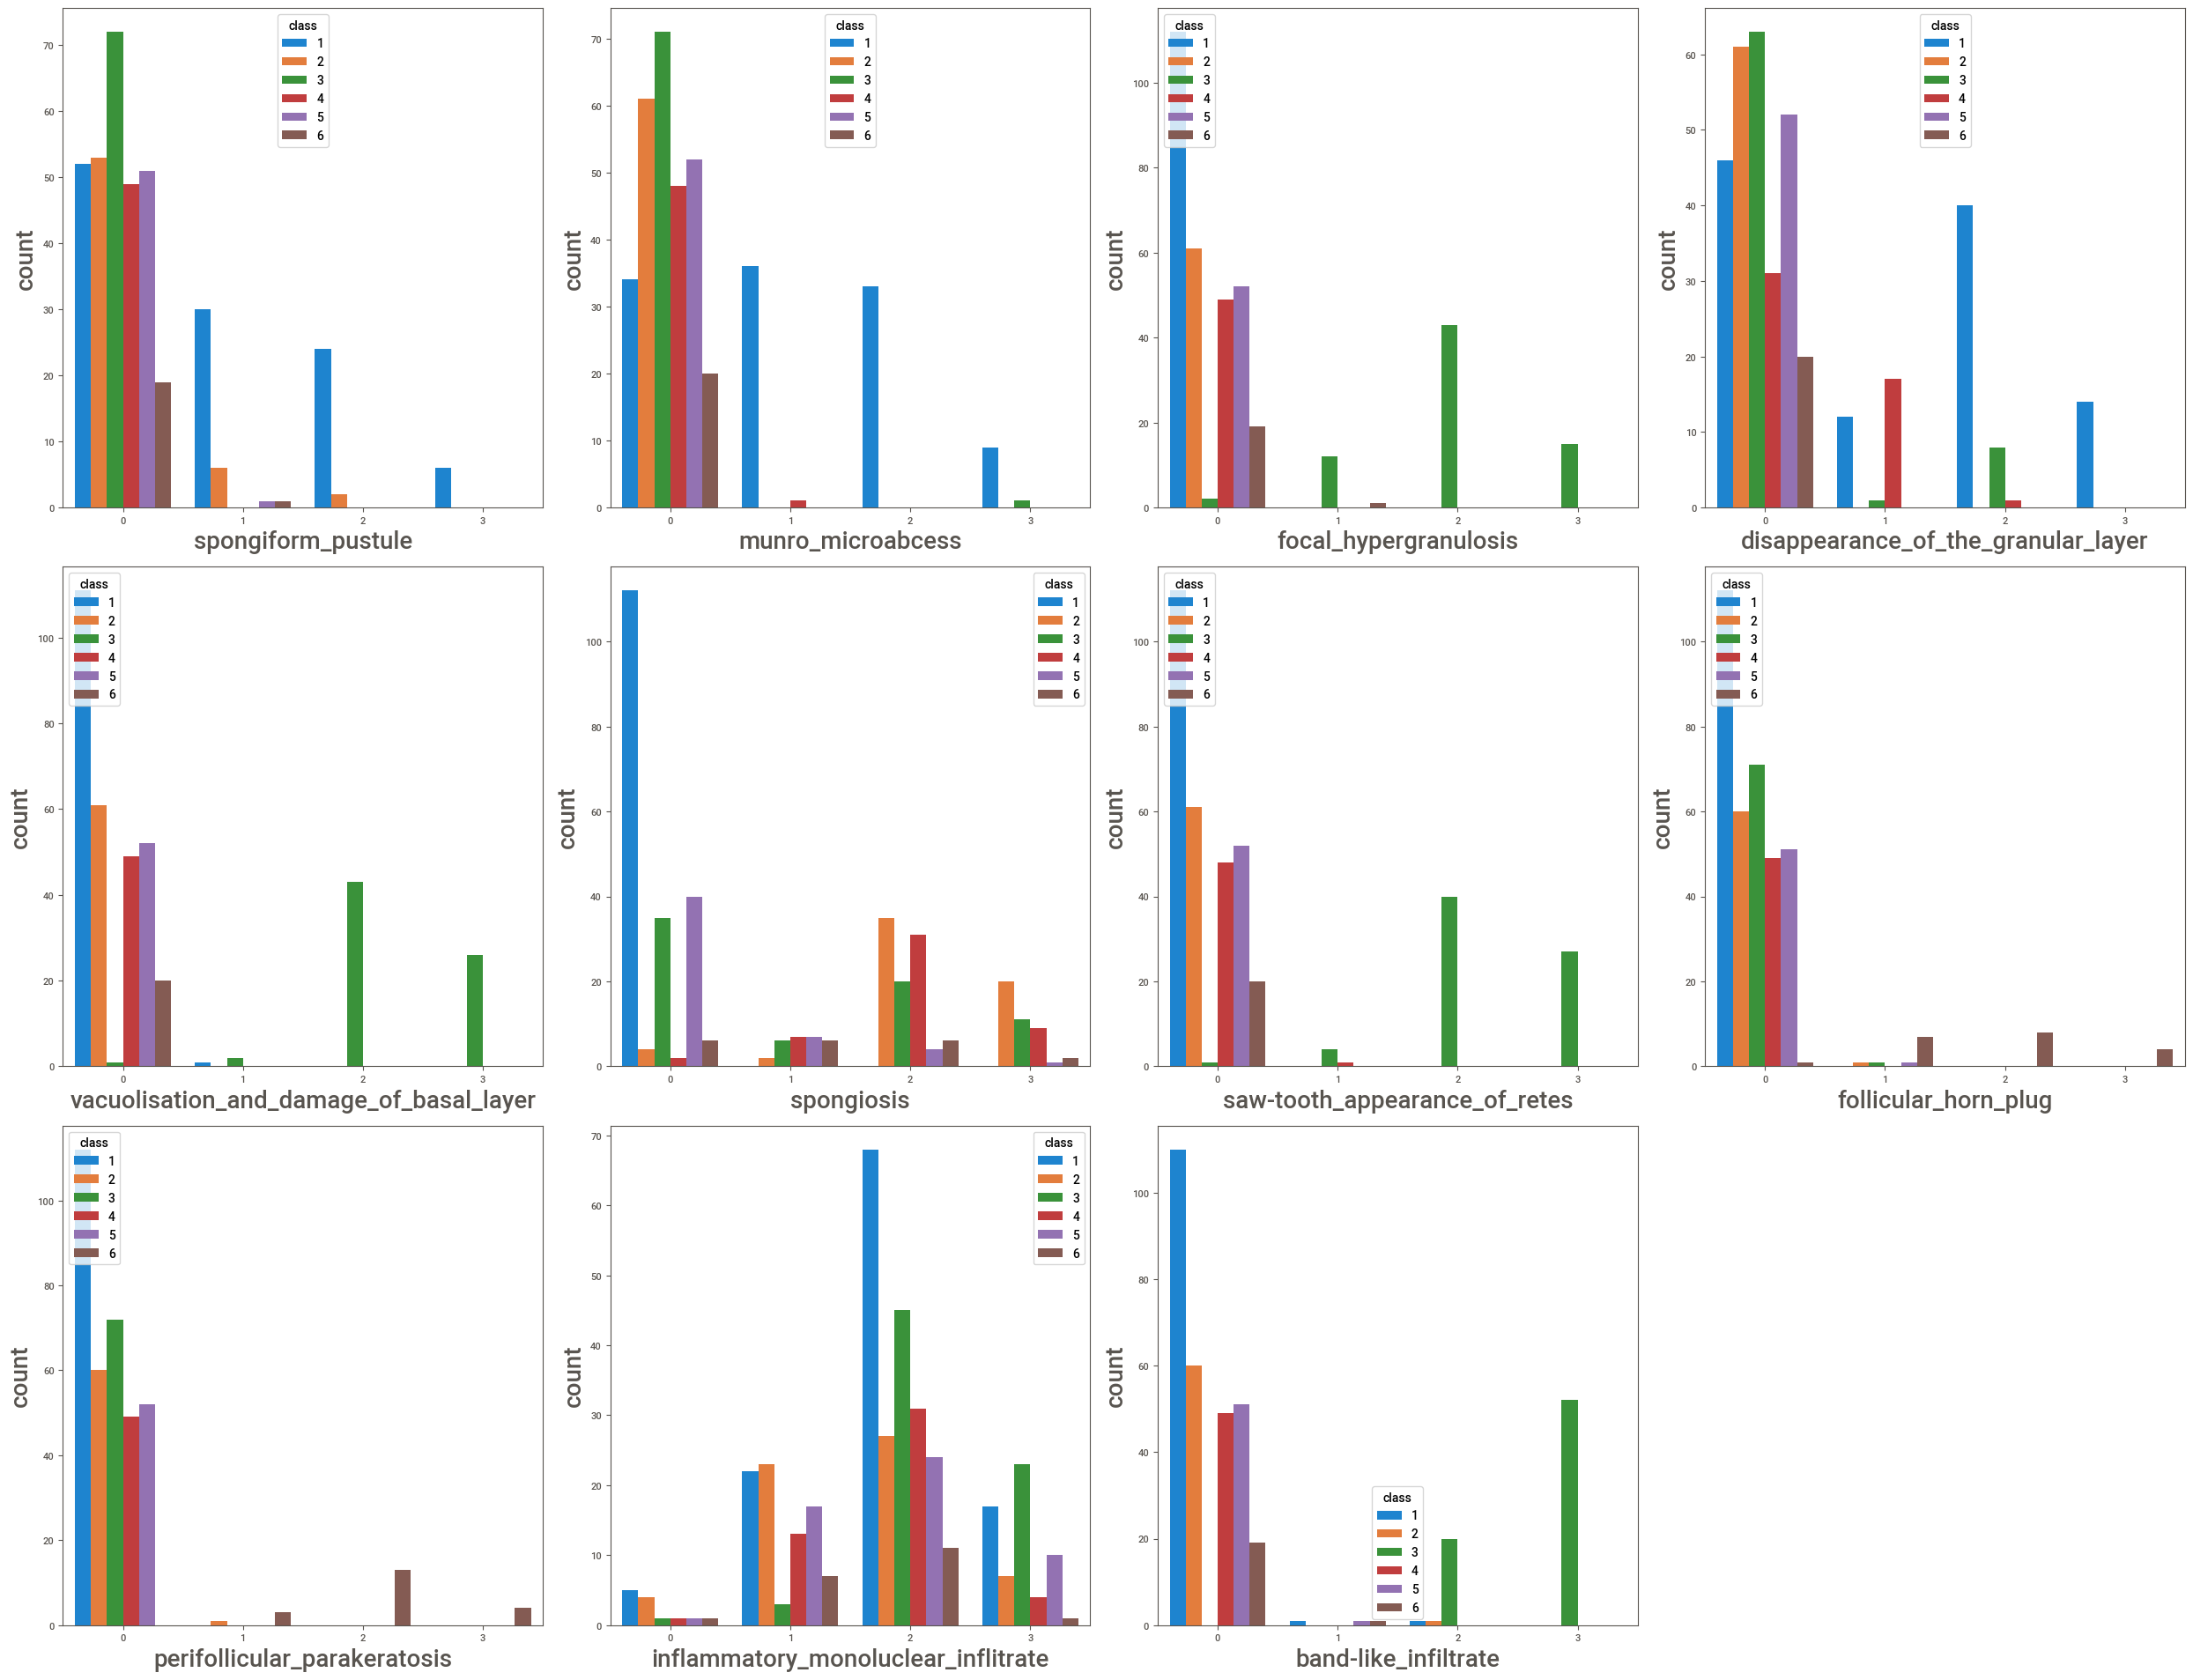

In [372]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data3:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.countplot(data3[column],hue='class',data=data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Insights

1) Erythma is mostly observed in Psoriasis & Seboreic dermatitis. Pityriasis rosea is moderately lower than Pityriasis rubra pilaris. However, Erythma is least observed in Chronic dermatitis.

2) Scaling is mostly observed in Psoriasis & Seboreic dermatitis. Lichen planus, Pityriasis rosea are moderately lower than Pityriasis rubra pilaris. However, it is least observed in Chronic dermatitis .

3) Definite_borders is high in Psoriasis & Lichen planus and moderately less in other classes.

4) Itiching is highly observed in Seboreic dermatitis, Lichen planus and Chronic dermatitis as compared to psoriasis ,pityriasis rosea & pityriasis rubra pilaris.

5) Koebner_phenomenon is approximate in Lichen planus & Pityriasis rosea and psoriasis is relatively lower. Seboreic dermatitis, Chronic dermatitis & Pityriasis rubra pilaris is not observed.

6) Polygonal_papules is observed only in Lichen planus.

7) Follicular_papules is highly observed in Pityriasis rubra pilaris and comparetively very less in cronic dermatitis. It is not observed in other classes.

8) Oral_mucosal_involvement is ovbserved only in Lichen planus.

9) Knee_and_elbow_involvement is highly observed in Psoriasis & Pityriasis rubra pilaris.It is not observed in other classes.

10) Scalp_involvement is highly observed in psoriasis & moderately in Pityriasis rubra pilaris.It is not observed or less observed in other classes.

11) Psoriasis,Seboreic dermatitis and Pityriasis rubra pilaris are recorded within family history.

12) Melanin_incontinence is observed only in Lichen planus.

13) Eosinophils_in_the_infiltrate is highly observed in Seboreic dermatitis. Lichen planus has shown moderately. Pityriasis rosea & Chronic dermatitis less indicate this while pityriasis rubra pilaris has not recorded this attribute.

14) PNL_infiltrate is highly observed in Psoriasis & Seboreic dermatitis. It is not observed in lichen planus & cronic dermatitis. Pityriasis rosea & pityriasis rubra pilaris have been least observed in this attribute.

15) Fibrosis_of_the_papillary_dermis has been observed only in Chronic dermatitis.

16) Psoriasis has shown no records for exocytosis but all others has comparatively indicated this attribute.

17) Acanthosis is commonly observed among psoriasis ,seboreic Dermatitis ,Lichen planus , Chronic dermatitis & Pityriasis rubra pilaris while less observed in Pityriasis rosea.

18) Psoriasis,Chcronic dermatitis & Pityriasis rubra pilaris relatively indicates the hyperkeratosis. While Seboreic dermatitis ,Lichen planus & Pityriasis rosea indicates it moderately.

19) Parakeratosis is a commonly observed among all rhe classes.

20) Clubbing_of_the_rete_ridges is observed only in Psoriasis.

21) Elongation_of_the_rete_ridges'is observed commonly in Psoriasis & Chronic dermatitis.

22) Thinning_of_the_suprapapillary_epidermis is observed only in class Psoriasis.

23) Spongiform_pustule is observed among Psoriasis & Seboreic dermatitis.

24) Munro_microabcess is observed in class Psoriasis only.

25) Focal_hypergranulosis is observed only in Lichen planus.

26) Disappearance_of_the_granular_layer is observed only in psoriasis & pityriasis rosea.

27) Only Lichen planus indicates vacuolisation_and_damage_of_basal_layer.

28) Spongiosis is commonly observed among seboreic dermatitis, lichen planus ,pityriasis rosea ,cronic dermatitis & pityriasis rubra pilaris. But not observed in Psoriasis.

29) Saw-tooth_appearance_of_retes is observed only in lichen planus.

30) Follicular_horn_plug is observed only in Pityriasis rubra pilaris.

31) Perifollicular_parakeratosis is observed in Pityriasis rubra pilaris.

32) Inflammatory_monoluclear_inflitrate is highly observed in Lichen Planus and is moderate among other classes.

33) Only Lichen planus indicates band-like_infiltrate.

34) Psoriasis, Seboreic dermatitis, Lichen Planus, Pityriasis rosea, Chronic dermatitis is observed moderately in all age groups but Pityriasis rubra pilaris is least observed.

<Figure size 720x1440 with 0 Axes>

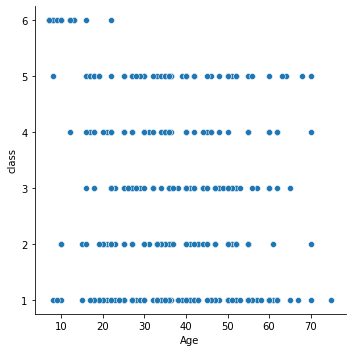

In [94]:
plt.figure(figsize=(10,20),facecolor='white')
sns.relplot(x='Age',y='class',data=data)

#### Insights from Age 

* Class 6 disease have less patients from all age groups.

* Class 5 disease have more patients from all the age groups.

* Class 2 and class 4 diseases have patients almost same age group.

* Class 1 disease is comparitively more in all age group.

# DATA PREPROCESSING AND FEATURE ENGINEERING

#### Step1: Checking missing values

In [374]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

* No missing values are present.

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

#### Step2: Handling the corrupted data.

In [376]:
## Changing the datatype
data['Age']=data['Age'].astype('float')

In [377]:
# data is normally distributed so replacing nan values by median
data['Age'].replace(np.nan,data['Age'].median(),inplace=True)

In [378]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

#### The datatype of 'Age' has been now changed from 'object' to 'float'

<Figure size 1000x600 with 0 Axes>

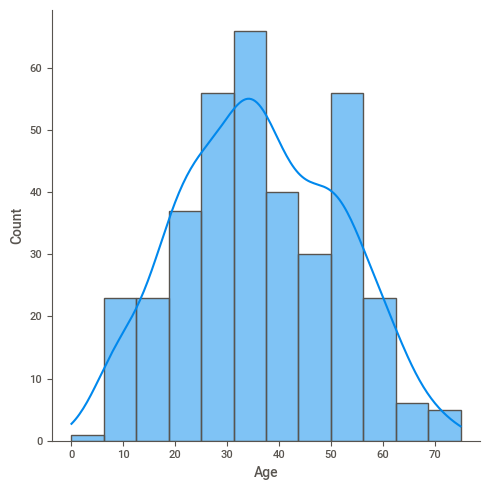

In [380]:
plt.figure(figsize=(10,6),facecolor='white')
sns.displot(x=data.Age,kde=True)

* Graph for age is normally distributed.

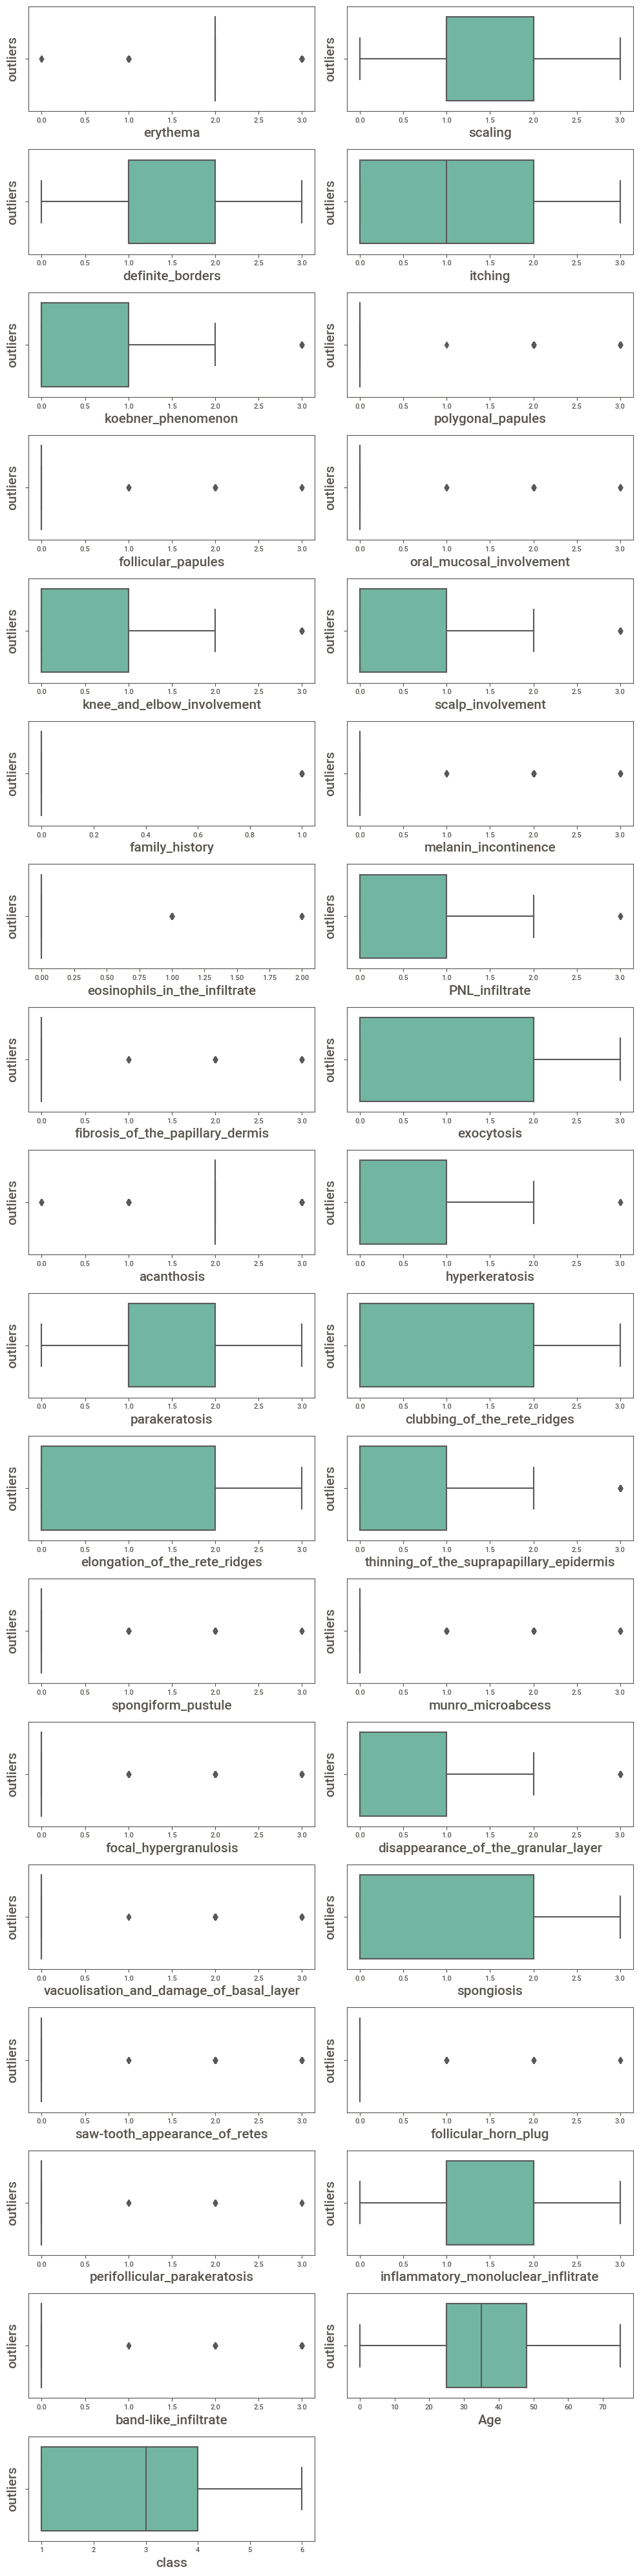

In [381]:
# checking outliers
plt.figure(figsize=(10,40),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=36:
        plt.subplot(18,2,plotnumber)
        sns.boxplot(x=data[column],palette='Set2')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('outliers',fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### Outliers are present in erythema,  koebner_phenomenon,  polygonal_papules,  follicular_papules,  oral_mucosal_involvement, knee_and_elbow_involvement,  scalp_involvement,  family_history,  melanin_incontinence,  eosinophils_in_the_infiltrate,   PNL_infiltrate,  fibrosis_of_the_papillary_dermis,  acanthosis,  hyperkeratosis, thinning_of_the_suprapapillary_epidermis,  spongiform_pustule,  munro_microabcess,  focal_hypergranulosis,  disappearance_of_the_granular_layer,   vacuolisation_and_damage_of_basal_layer,  sawtooth_appearance_of_retes,  follicular_horn_plug,  perifollicular_parakeratosis,  band-like_infiltrate. 

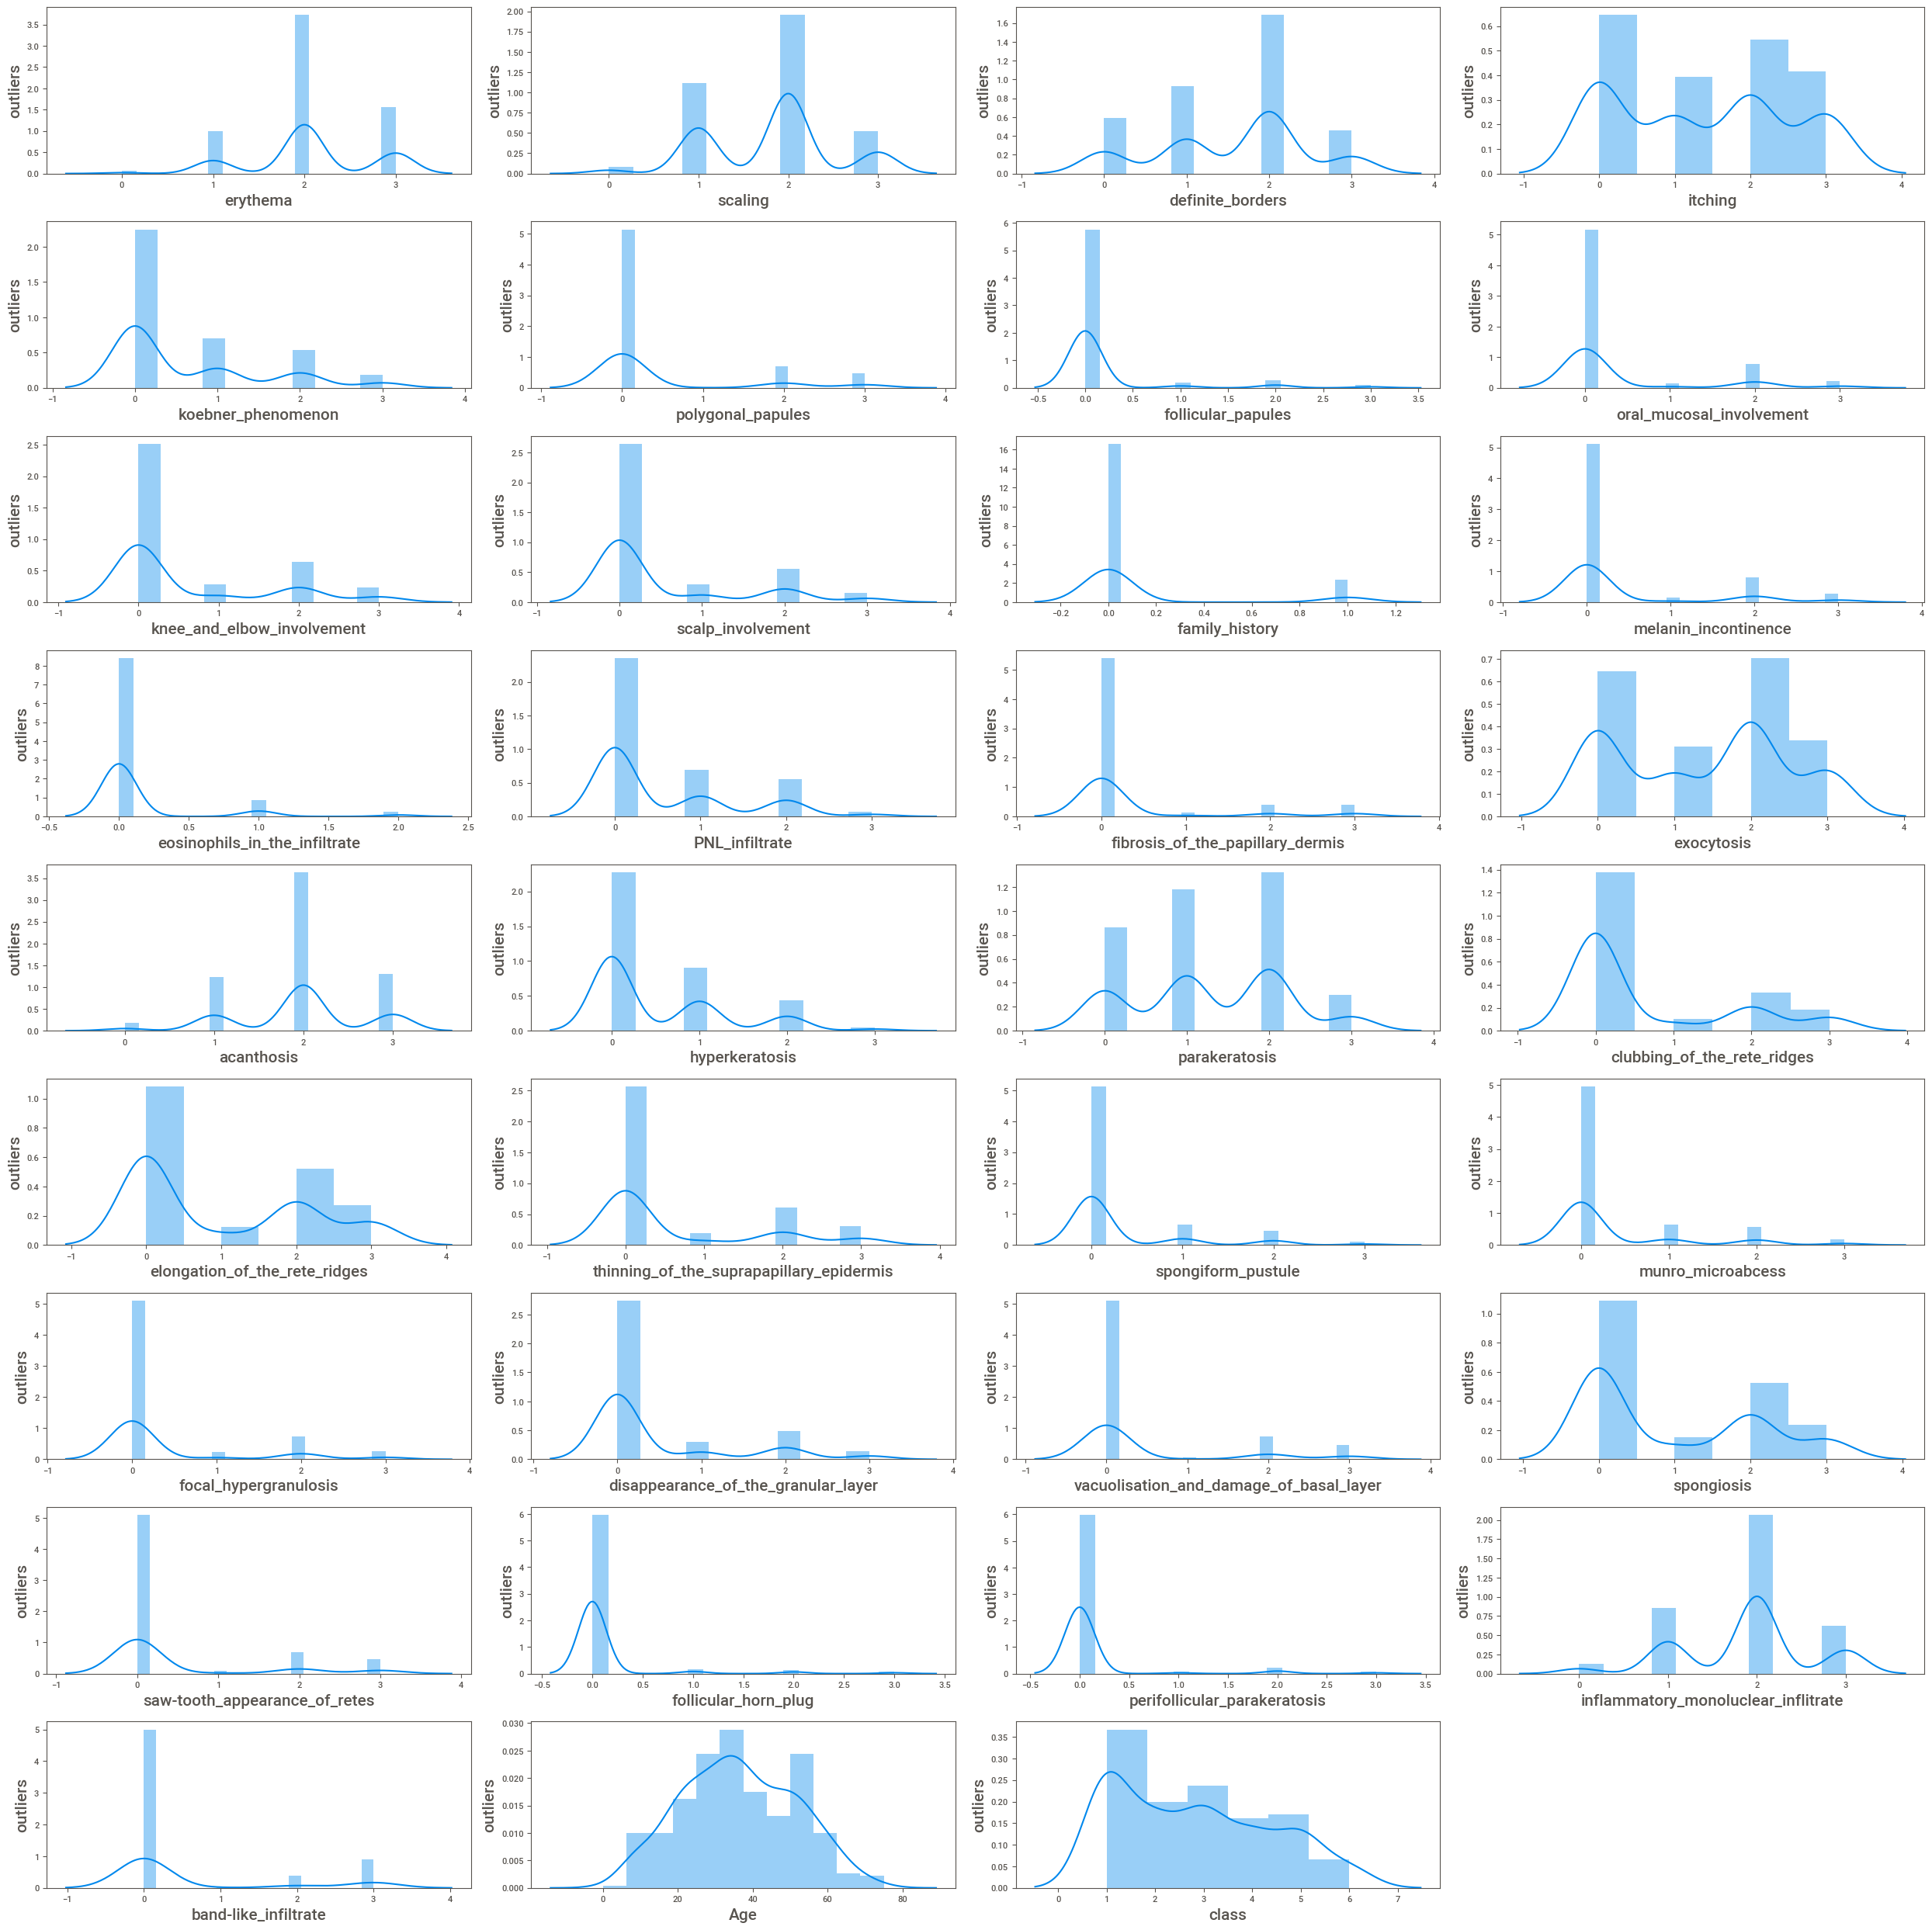

In [382]:
# Checking distribution of outliers 
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=36:
        plt.subplot(9,4,plotnumber)
        sns.distplot(x=data[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('outliers',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [383]:
## Outlier Handling

In [384]:
# Interquantile Range
from scipy import stats

In [385]:
IQR=stats.iqr(data['disappearance_of_the_granular_layer'],interpolation='midpoint')
IQR
Q1 = data['disappearance_of_the_granular_layer'].quantile(0.25)
Q3 = data['disappearance_of_the_granular_layer'].quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
min_limit,max_limit
print('min limit',len(data.loc[data['disappearance_of_the_granular_layer'] < min_limit]))
print('max limit',len(data.loc[data['disappearance_of_the_granular_layer'] > max_limit]))
#data.shape[0] is 366
# percentage of data outliers
print('percentage of min limit outliers is',0/366 *100)
print('percentage of max limit outliers is',14/366 *100)

min limit 0
max limit 14
percentage of min limit outliers is 0.0
percentage of max limit outliers is 3.825136612021858


In [386]:
## Imputing the outliers as the count is high
data.loc[data['disappearance_of_the_granular_layer'] > max_limit,'disappearance_of_the_granular_layer']=np.median(data['disappearance_of_the_granular_layer'])

In [387]:
IQR=stats.iqr(data['koebner_phenomenon'],interpolation='midpoint')
IQR
Q1 = data['koebner_phenomenon'].quantile(0.25)
Q3 = data['koebner_phenomenon'].quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
min_limit,max_limit
print('min limit',len(data.loc[data['koebner_phenomenon'] < min_limit]))
print('max limit',len(data.loc[data['koebner_phenomenon'] > max_limit]))
#data.shape[0] is 366
# percentage of data outliers
print('percentage of min limit outliers is',0/366 *100)
print('percentage of max limit outliers is',18/366 *100)

min limit 0
max limit 18
percentage of min limit outliers is 0.0
percentage of max limit outliers is 4.918032786885246


In [388]:
## imputing the outliers as the count is high
data.loc[data['koebner_phenomenon'] > max_limit,'koebner_phenomenon']=np.median(data['koebner_phenomenon'])

In [389]:
IQR=stats.iqr(data['hyperkeratosis'],interpolation='midpoint')
IQR
Q1 = data['hyperkeratosis'].quantile(0.25)
Q3 = data['hyperkeratosis'].quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
min_limit,max_limit
print('min limit',len(data.loc[data['hyperkeratosis'] < min_limit]))
print('max limit',len(data.loc[data['hyperkeratosis'] > max_limit]))
#data.shape[0] is 366
# percentage of data outliers
print('percentage of min limit outliers is',0/366 *100)
print('percentage of max limit outliers is',14/366 *100)

min limit 0
max limit 5
percentage of min limit outliers is 0.0
percentage of max limit outliers is 3.825136612021858


In [390]:
## imputing the outliers as the count is high
data.loc[data['hyperkeratosis'] > max_limit,'hyperkeratosis']=np.median(data['hyperkeratosis'])

In [391]:
IQR=stats.iqr(data['scalp_involvement'],interpolation='midpoint')
IQR
Q1 = data['scalp_involvement'].quantile(0.25)
Q3 = data['scalp_involvement'].quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
min_limit,max_limit
print('min limit',len(data.loc[data['scalp_involvement'] < min_limit]))
print('max limit',len(data.loc[data['scalp_involvement'] > max_limit]))
#data.shape[0] is 366
# percentage of data outliers
print('percentage of min limit outliers is',0/366 *100)
print('percentage of max limit outliers is',16/366 *100)

min limit 0
max limit 16
percentage of min limit outliers is 0.0
percentage of max limit outliers is 4.371584699453552


In [392]:
## imputing the outliers as the count is high
data.loc[data['scalp_involvement'] > max_limit,'scalp_involvement']=np.median(data['scalp_involvement'])

In [393]:
IQR=stats.iqr(data['PNL_infiltrate'],interpolation='midpoint')
IQR
Q1 = data['PNL_infiltrate'].quantile(0.25)
Q3 = data['PNL_infiltrate'].quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
min_limit,max_limit
print('min limit',len(data.loc[data['PNL_infiltrate'] < min_limit]))
print('max limit',len(data.loc[data['PNL_infiltrate'] > max_limit]))
#data.shape[0] is 366
# percentage of data outliers
print('percentage of min limit outliers is',0/366 *100)
print('percentage of max limit outliers is',7/366 *100)

min limit 0
max limit 7
percentage of min limit outliers is 0.0
percentage of max limit outliers is 1.912568306010929


In [394]:
## imputing the outliers as the count is high
data.loc[data['PNL_infiltrate'] > max_limit,'PNL_infiltrate']=np.median(data['PNL_infiltrate'])

#### * Erythema

1] Percentage of min limit outliers is 16.666666666666664

2] Percentage of max limit outliers is 24.59016393442623

3] Outliers are more than 5% so no imputation required

#### * Follicular papules

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 9.01639344262295

3] Outliers are more than 5% so no imputation required

#### * Oral_mucosal_involvement

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 18.30601092896175

3] Outliers are more than 5% so no imputation required

#### * Family history

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 12.568306010928962

3] Outliers are more than 5% so no imputation required

#### * Melanin_incontinence

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 19.12568306010929

3] Outliers are more than 5% so no imputation required

#### * Eosinophils_in_the_infiltrate

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 11.475409836065573

3] Outliers are more than 5% so no imputation required

#### * Fibrosis_of_the_papillary_dermis

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 14.754098360655737

3] Outliers are more than 5% so no imputation required

#### * Acanthosis

1] Percentage of min limit outliers is 22.131147540983605

2] Percentage of max limit outliers is 20.491803278688526

3] Outliers are more than 5% so no imputation required

#### * Spongiform_pustule

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 19.12568306010929

3] Outliers are more than 5% so no imputation required

#### * Munro_microabcess

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 21.85792349726776

3] Outliers are more than 5% so no imputation required

#### * Focal_hypergranulosis

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 19.398907103825135

3] Outliers are more than 5% so no imputation required

#### * Vacuolisation_and_damage_of_basal_layer

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 19.398907103825135

3] Outliers are more than 5% so no imputation required

#### * Saw-tooth_appearance_of_retes

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 19.672131147540984

3] Outliers are more than 5% so no imputation required

#### * Follicular_horn_plug

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 6.0109289617486334

3] Outliers are more than 5% so no imputation required

#### * Perifollicular_parakeratosis

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 5.737704918032787

3] Outliers are more than 5% so no imputation required

#### * Band-like_infiltrate

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 21.03825136612022

3] Outliers are more than 5% so no imputation required

#### * Knee_and_elbow_involvement

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 6.284153005464481

3] Outliers are more than 5% so no imputation required

#### * Scalp_involvement

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 4.371584699453552

3] Outliers are less than 5% so imputation required

#### * Koebner_phenomenon

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 4.918032786885246

3] Outliers are less than 5% so imputation required

#### * PNL_infiltrate

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 1.912568306010929

3] Outliers are less than 5% so imputation required

#### * Hyperkeratosis

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 1.366120218579235

3] Outliers are less than 5% so imputation required

#### * Thinning_of_the_suprapapillary_epidermis

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 8.469945355191257

3] Outliers are more than 5% so no imputation required

#### * Disappearance_of_the_granular_layer

1] Percentage of min limit outliers is 0.0

2] Percentage of max limit outliers is 3.825136612021858

3] Outliers are less than 5% so imputation required

In [395]:
data.loc[data['koebner_phenomenon']>max_limit]
data.loc[data['scalp_involvement'] > max_limit]
data.loc[data['PNL_infiltrate'] > max_limit]
data.loc[data['hyperkeratosis'] > max_limit]
data.loc[data['disappearance_of_the_granular_layer'] > max_limit]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


In [396]:
# scaling age feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[['Age']]=sc.fit_transform(data[['Age']])

# FEATURE SELECTION

<AxesSubplot:>

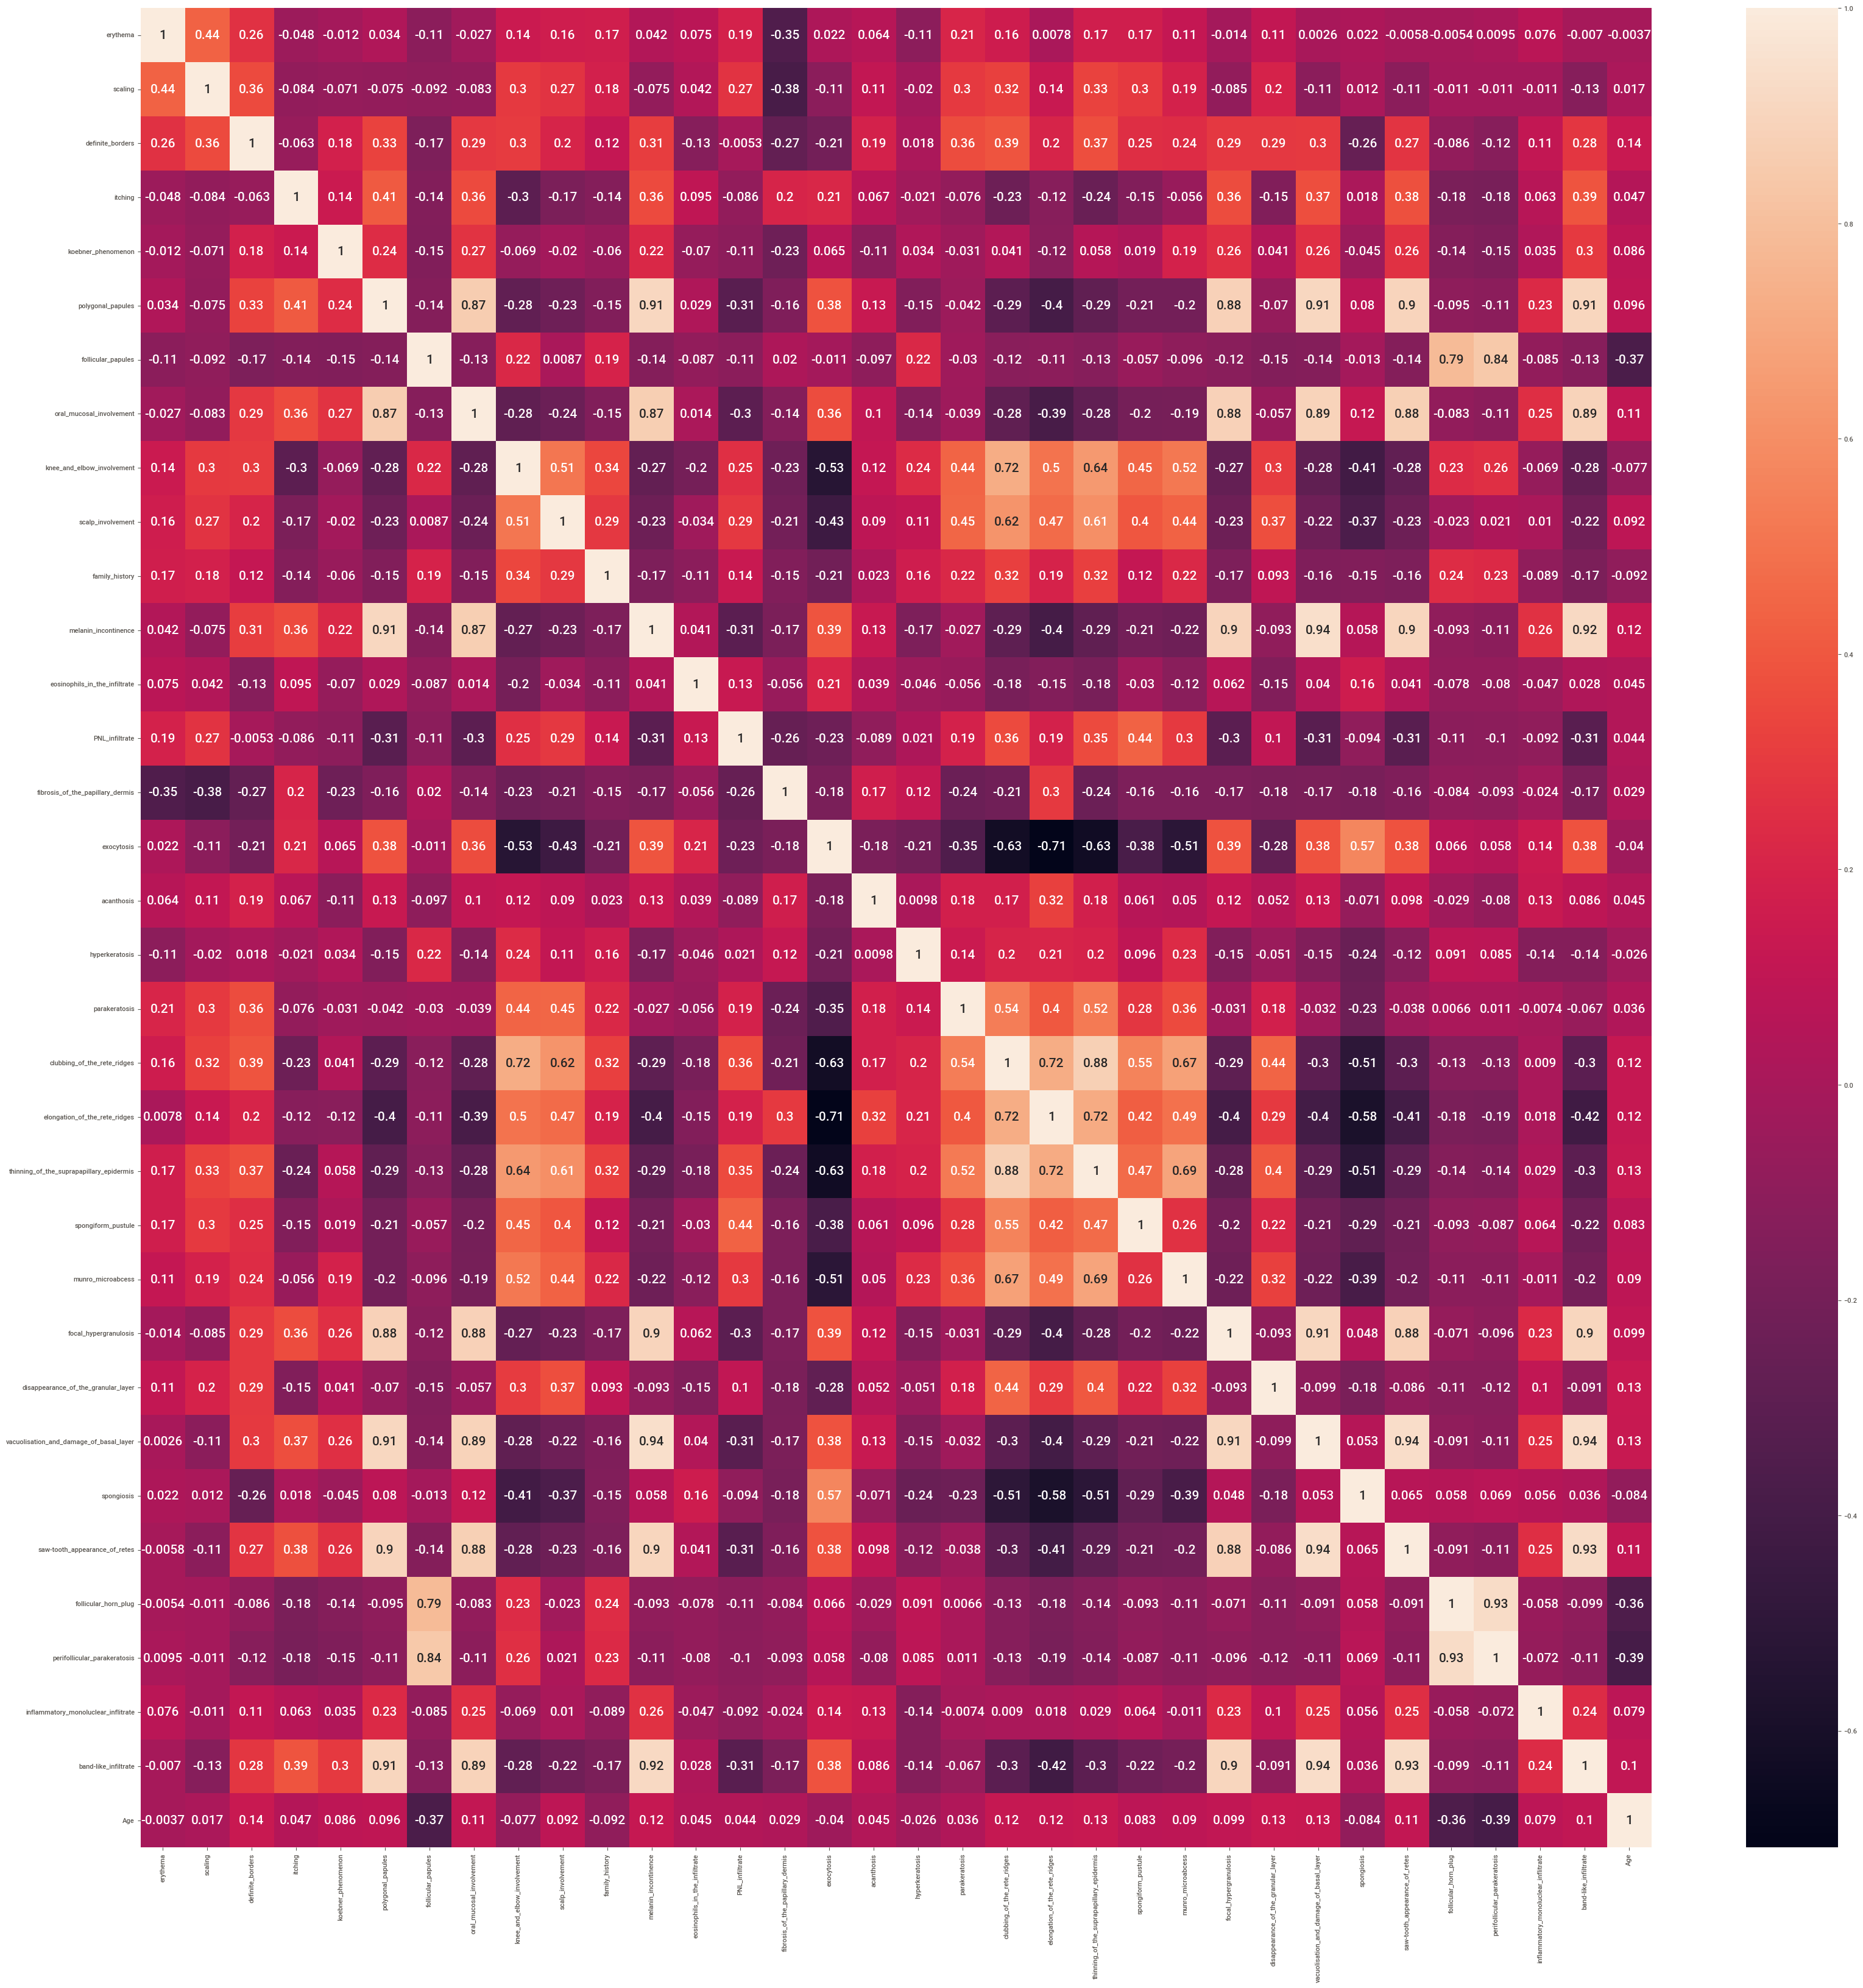

In [397]:
## Dropping of unwanted features and checking correlation
plt.figure(figsize=(40,40))
sns.heatmap(data.drop('class',axis=1).corr(),annot=True,annot_kws={"size":15})

# MODEL SELECTION AND BUILDING

In [398]:
#Defining dependent and independent features.
x=data.drop(['class'],axis=1)
y=data['class']

In [399]:
#training and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [400]:
x_train.shape

(292, 34)

In [401]:
x_test.shape

(74, 34)

In [402]:
y_train.shape

(292,)

In [403]:
y_test.shape

(74,)

In [404]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#### SUPPORT VECTOR MACHINE

In [405]:
from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_train,y_train)

SVC()

In [406]:
y_predict_SVC=svclassifier.predict(x_test)
y_predict_SVC

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 2, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 2, 3,
       3, 1, 4, 6], dtype=int64)

#### Model evaluation for Support Vector machine

In [407]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score

In [422]:
acc_SVC=accuracy_score(y_test,y_predict_SVC)
acc_SVC

0.967391304347826

In [423]:
print(classification_report(y_test,y_predict_SVC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        17
           4       1.00      0.73      0.84        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92



In [424]:
cm1=pd.crosstab(y_test,y_predict_SVC)
cm1

col_0,1,2,3,4,5,6
class,,,,,,
1,34,0,0,0,0,0
2,0,12,0,0,0,0
3,0,0,17,0,0,0
4,0,3,0,8,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,4


In [425]:
f1_SVC=f1_score(y_test,y_predict_SVC,average='weighted')
f1_SVC

0.9666285278413425

In [426]:
recall_SVC=recall_score(y_test,y_predict_SVC,average='weighted')
recall_SVC

0.967391304347826

In [427]:
precision_SVC=precision_score(y_test,y_predict_SVC,average='weighted')
precision_SVC

0.9739130434782608

#### Hyperparameter tuning of Support Vector Machine

In [414]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=70, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [415]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'random_state': 1}


In [416]:
clf=SVC(C=0.1, gamma=0.1,random_state=1)

In [417]:
clf.fit(x, y)

SVC(C=0.1, gamma=0.1, random_state=1)

In [418]:
y_clf_svc=clf.predict(x_test)
y_clf_svc

array([1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 1, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 1, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 1, 2, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 2, 3,
       3, 1, 4, 1], dtype=int64)

In [419]:
print(classification_report(y_test,y_clf_svc))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        34
           2       0.75      1.00      0.86        12
           3       1.00      0.94      0.97        17
           4       1.00      0.64      0.78        11
           5       1.00      1.00      1.00        14
           6       0.00      0.00      0.00         4

    accuracy                           0.90        92
   macro avg       0.77      0.76      0.76        92
weighted avg       0.88      0.90      0.88        92



In [420]:
cm=pd.crosstab(y_test,y_clf_svc)
cm

col_0,1,2,3,4,5
class,,,,,
1,34,0,0,0,0
2,0,12,0,0,0
3,1,0,16,0,0
4,0,4,0,7,0
5,0,0,0,0,14
6,4,0,0,0,0


In [421]:
f1=f1_score(y_test,y_clf_svc,average='weighted')
f1

0.8804059913351159

#### DECISION TREE CLASSIFIER

In [185]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [186]:
y_hat_DT=dt.predict(x_test)
y_hat_DT

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       4, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 4, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 2, 2, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 4, 3,
       3, 1, 4, 1], dtype=int64)

#### Model evaluation for Decision Tree Classifier

In [237]:
accuracy_DT=accuracy_score(y_test,y_hat_DT)
accuracy_DT

0.9565217391304348

In [238]:
print(classification_report(y_test,y_hat_DT))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.86      1.00      0.92        12
           3       1.00      0.88      0.94        17
           4       0.91      0.91      0.91        11
           5       1.00      1.00      1.00        14
           6       1.00      0.75      0.86         4

    accuracy                           0.96        92
   macro avg       0.96      0.92      0.94        92
weighted avg       0.96      0.96      0.96        92



In [233]:
f1score_DT=f1_score(y_test,y_hat_DT,average='weighted')
f1score_DT

0.9559808791555011

In [234]:
recall_DT=recall_score(y_test,y_hat_DT,average='weighted')
recall_DT

0.9565217391304348

In [235]:
precision_DT=recall_score(y_test,y_hat_DT,average='weighted')
precision_DT

0.9565217391304348

In [236]:
cm_DT=pd.crosstab(y_test,y_hat_DT)
cm_DT

col_0,1,2,3,4,5,6
class,,,,,,
1,34,0,0,0,0,0
2,0,12,0,0,0,0
3,0,1,15,1,0,0
4,0,1,0,10,0,0
5,0,0,0,0,14,0
6,1,0,0,0,0,3


#### Hyperparameter tuning of Decision Tree Classifier 

In [270]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [271]:
print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [272]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [273]:
tree_cv.best_score_

nan

In [274]:
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=1,min_samples_leaf=1,
                           min_samples_split=2,splitter='best')

In [275]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [276]:
y_hat1=dt1.predict(x_test)
y_hat1

array([1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3,
       3, 1, 3, 1], dtype=int64)

In [277]:
test_accuracy=accuracy_score(y_test,y_hat1)
test_accuracy

0.5434782608695652

In [278]:
test_f1=f1_score(y_test,y_hat1,average='weighted')
test_f1

0.4383972819700607

In [279]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       0.94      0.97      0.96        34
           2       0.00      0.00      0.00        12
           3       0.30      1.00      0.46        17
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         4

    accuracy                           0.54        92
   macro avg       0.21      0.33      0.24        92
weighted avg       0.40      0.54      0.44        92



#### RANDOM FOREST

In [280]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [192]:
y_predict_RF=rf_clf.predict(x_test)
y_predict_RF

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 2, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 2, 3,
       3, 1, 4, 6], dtype=int64)

#### Model evaluation of Random Forest Classifier

In [239]:
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        17
           4       1.00      0.73      0.84        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92



In [240]:
accur_RF=accuracy_score(y_test,y_predict_RF)
accur_RF

0.967391304347826

In [241]:
f_Score_RF=f1_score(y_test,y_predict_RF,average='weighted')
f_Score_RF

0.9666285278413425

In [242]:
recall_RF=recall_score(y_test,y_predict_RF,average='weighted')
recall_RF

0.967391304347826

In [243]:
precision_RF=recall_score(y_test,y_predict_RF,average='weighted')
precision_RF

0.967391304347826

In [244]:
cm_RF=pd.crosstab(y_test,y_predict_RF)
cm_RF

col_0,1,2,3,4,5,6
class,,,,,,
1,34,0,0,0,0,0
2,0,12,0,0,0,0
3,0,0,17,0,0,0
4,0,3,0,8,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,4


#### K_NEAREST NEIGHBOUR

In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [246]:
y_pred_KNN=knn.predict(x_test)
y_pred_KNN

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 2, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 2, 3,
       3, 1, 4, 6], dtype=int64)

#### Model evaluation for K Nearest Neighbours

In [247]:
accur_KNN=accuracy_score(y_test,y_pred_KNN)
accur_KNN

0.967391304347826

In [248]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        17
           4       1.00      0.73      0.84        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92



In [249]:
f1_KNN=f1_score(y_test,y_pred_KNN,average='weighted')
f1_KNN

0.9666285278413425

In [250]:
recall_KNN=recall_score(y_test,y_pred_KNN,average='weighted')
recall_KNN

0.967391304347826

In [251]:
precision_KNN=precision_score(y_test,y_pred_KNN,average='weighted')
precision_KNN

0.9739130434782608

In [252]:
cm_KNN=pd.crosstab(y_test,y_pred_KNN)
cm_KNN

col_0,1,2,3,4,5,6
class,,,,,,
1,34,0,0,0,0,0
2,0,12,0,0,0,0
3,0,0,17,0,0,0
4,0,3,0,8,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,4


### Bagging using Logistic Regression

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier()
Bclas = BaggingClassifier(base_estimator=dt,n_estimators=100)
Bclas.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [254]:
y_pred_bagg = Bclas.predict(x_test)
y_pred_bagg

array([1, 1, 2, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 4, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 2, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1, 5, 5, 2, 5, 5, 2, 1, 4, 3, 3, 2, 1, 4, 3,
       3, 1, 4, 1], dtype=int64)

#### Model evaluation of Bagging using Logistic Regression

In [255]:
accur_bagg=accuracy_score(y_test,y_pred_bagg)
accur_bagg

0.967391304347826

In [256]:
print(classification_report(y_test,y_pred_bagg))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        17
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00        14
           6       1.00      0.75      0.86         4

    accuracy                           0.97        92
   macro avg       0.97      0.93      0.94        92
weighted avg       0.97      0.97      0.97        92



In [257]:
f1_bagg=f1_score(y_test,y_pred_bagg,average='weighted')
f1_bagg

0.9664428356772403

In [258]:
recall_bagg=recall_score(y_test,y_pred_bagg,average='weighted')
recall_bagg

0.967391304347826

In [259]:
precision_bagg=precision_score(y_test,y_pred_bagg,average='weighted')
precision_bagg

0.970807453416149

In [260]:
cm_bagg=pd.crosstab(y_test,y_pred_bagg)
cm_bagg

col_0,1,2,3,4,5,6
class,,,,,,
1,34,0,0,0,0,0
2,0,12,0,0,0,0
3,0,0,17,0,0,0
4,0,2,0,9,0,0
5,0,0,0,0,14,0
6,1,0,0,0,0,3


### Comparison of models

### Conclusion:

The Following are special insights derived from EDA:

> It can be seen that Psoriasis, Seboreic dermatitis and Pityriasis rubra pilaris are recorded within family history but others did not indicate.

> Parakeratosis & Inflammatory_monoluclear_inflitrate are common Histopathological Attributes among all the diseases.

> Only lichen planus disease indicates the clinical attributes like polygonal_papules & oral_mucosal_involvement.

> And following Histopathological Attributes were observed only in Lichen Planus disease
    * Vacuolisation_and_damage_of_basal_layer
    * Melanin_incontinence
    * Focal_hypergranulosis
    * Band-like_infiltrate
    * Saw-tooth_appearance_of_retes
    
> Clubbing_of_the_rete_ridges (clinical attribute) ; thinning_of_the_suprapapillary_epidermis &  munro_microabcess are Histopathological Attributes identified only among Psoriasis disease group 

> Psoriasis has no records for exocytosis (histopathological attribute) but all others indicate this attribute. 
   
> Follicular_horn_plug symptom & Perifollicular_parakeratosis symptom observed only in Pityriasis rubra pilaris disease  group.
